<a href="https://www.kaggle.com/code/abmsayem/connecting-the-world-a-comprehensive-overview?scriptVersionId=131427514" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

The past few decades have seen a remarkable transformation in the way people access and use the internet. From its humble beginnings in the 1990s, the internet has become an essential part of modern life, with billions of people around the world relying on it for communication, information, and entertainment.

One of the key drivers of this transformation has been the rapid expansion of broadband internet access. Broadband internet, which offers high-speed internet access via wired or wireless connections, has revolutionized the way people use the internet, enabling faster and more reliable connections and facilitating the development of new applications and services.

Over the same period, there has been a dramatic increase in the number of internet users worldwide, with millions of people from all walks of life coming online for the first time. This has been facilitated by the proliferation of mobile devices and the widespread availability of mobile cellular subscriptions, which now account for a significant proportion of internet use.

In this notebook, I will examine the growth of broadband subscriptions, internet users, mobile cellular subscriptions, and internet user ratios in global, local, and regional scales since 1990 to 2020.

***Data Source: Our World In Data***

# DATA CLEANING AND PREPARATION

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set_style('darkgrid')
plt.rcParams['font.size'] = 14
plt.rcParams['figure.figsize'] = (17, 5)
plt.rcParams['figure.facecolor'] = '#00000000'

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/tech-from-owid/share-of-individuals.csv
/kaggle/input/tech-from-owid/broadband.csv
/kaggle/input/tech-from-owid/internet.csv
/kaggle/input/tech-from-owid/mobile.csv


In [2]:
df1 = pd.read_csv('/kaggle/input/tech-from-owid/broadband.csv')
df2 = pd.read_csv('/kaggle/input/tech-from-owid/internet.csv')
df3 = pd.read_csv('/kaggle/input/tech-from-owid/mobile.csv')
df4 = pd.read_csv('/kaggle/input/tech-from-owid/share-of-individuals.csv')

In [3]:
broadband_head = df1[df1.Year == 2020].sort_values('Fixed broadband subscriptions (per 100 people)', ascending=False).head(20).reset_index().drop(['index','Code'], axis=1)

broadband_tail = df1[df1.Year == 2020].sort_values('Fixed broadband subscriptions (per 100 people)', ascending=False).tail(20).reset_index().drop(['index', 'Code'], axis = 1)

broadband_eap = df1[df1.Entity == 'East Asia and Pacific'].reset_index().drop(['index','Code'], axis=1)

broadband_eca = df1[df1.Entity == 'Europe and Central Asia'].reset_index().drop(['index','Code'], axis=1)

broadband_eu = df1[df1.Entity == 'European Union'].reset_index().drop(['index','Code'], axis=1)

broadband_lac = df1[df1.Entity == 'Latin America and Caribbean'].reset_index().drop(['index','Code'], axis=1)

broadband_mena = df1[df1.Entity == 'Middle East and North Africa'].reset_index().drop(['index','Code'], axis=1)

broadband_na = df1[df1.Entity == 'North America'].reset_index().drop(['index','Code'], axis=1)

broadband_sa = df1[df1.Entity == 'South Asia'].reset_index().drop(['index','Code'], axis=1)

broadband_ssa = df1[df1.Entity == 'Sub-Saharan Africa'].reset_index().drop(['index','Code'], axis=1)

broadband_wor = df1[df1.Entity == 'World'].reset_index().drop(['index','Code'], axis=1)

In [4]:
internet_tr = df2[df2.Year == 2020].sort_values('Number of Internet users', ascending=False).reset_index().drop([0,1,2,3,4,6,8,9,10,16]).head(20)
internet_head = internet_tr.reset_index().drop(['level_0', 'index', 'Code'], axis=1)

internet_tail = df2[df2.Year == 2020].sort_values('Number of Internet users', ascending=False).tail(20).reset_index().drop(['index', 'Code'], axis = 1)

internet_asia = df2[df2.Entity == 'Asia'].reset_index().drop(['index','Code'], axis=1)

internet_africa = df2[df2.Entity == 'Africa'].reset_index().drop(['index','Code'], axis=1)

internet_europe = df2[df2.Entity == 'Europe'].reset_index().drop(['index','Code'], axis=1)

internet_nam = df2[df2.Entity == 'North America'].reset_index().drop(['index','Code'], axis=1)

internet_oce = df2[df2.Entity == 'Oceania'].reset_index().drop(['index','Code'], axis=1)

internet_sam = df2[df2.Entity == 'South America'].reset_index().drop(['index','Code'], axis=1)

internet_wor = df2[df2.Entity == 'World'].reset_index().drop(['index','Code'], axis=1)

In [5]:
mobile_head = df3[df3.Year == 2020].sort_values('Mobile cellular subscriptions (per 100 people)', ascending=False).head(20).reset_index().drop(['index','Code'], axis=1)

mobile_tail = df3[df3.Year == 2020].sort_values('Mobile cellular subscriptions (per 100 people)', ascending=False).tail(20).reset_index().drop(['index', 'Code'], axis = 1)

mobile_eap = df3[df3.Entity == 'East Asia and Pacific'].reset_index().drop(['index','Code'], axis=1)

mobile_eca = df3[df3.Entity == 'Europe and Central Asia'].reset_index().drop(['index','Code'], axis=1)

mobile_eu = df3[df3.Entity == 'European Union'].reset_index().drop(['index','Code'], axis=1)

mobile_lac = df3[df3.Entity == 'Latin America and Caribbean'].reset_index().drop(['index','Code'], axis=1)

mobile_mena = df3[df3.Entity == 'Middle East and North Africa'].reset_index().drop(['index','Code'], axis=1)

mobile_na = df3[df3.Entity == 'North America'].reset_index().drop(['index','Code'], axis=1)

mobile_sa = df3[df3.Entity == 'South Asia'].reset_index().drop(['index','Code'], axis=1)

mobile_ssa = df3[df3.Entity == 'Sub-Saharan Africa'].reset_index().drop(['index','Code'], axis=1)

mobile_wor = df3[df3.Entity == 'World'].reset_index().drop(['index','Code'], axis=1)

In [6]:
ratio_head = df4[df4.Year == 2020].sort_values('Individuals using the Internet (% of population)', ascending=False).head(20).reset_index().drop(['index','Code'], axis=1)

ratio_tail_tr = df4[df4.Year == 2020].sort_values('Individuals using the Internet (% of population)', ascending=False).drop(3440).tail(20)
ratio_tail = ratio_tail_tr.reset_index().drop(['index', 'Code'], axis = 1)

ratio_eap = df4[df4.Entity == 'East Asia and Pacific'].reset_index().drop(['index','Code'], axis=1)

ratio_eca = df4[df4.Entity == 'Europe and Central Asia'].reset_index().drop(['index','Code'], axis=1)

ratio_eu = df4[df4.Entity == 'European Union'].reset_index().drop(['index','Code'], axis=1)

ratio_lac = df4[df4.Entity == 'Latin America and Caribbean'].reset_index().drop(['index','Code'], axis=1)

ratio_mena = df4[df4.Entity == 'Middle East and North Africa'].reset_index().drop(['index','Code'], axis=1)

ratio_na = df4[df4.Entity == 'North America'].reset_index().drop(['index','Code'], axis=1)

ratio_sa = df4[df4.Entity == 'South Asia'].reset_index().drop(['index','Code'], axis=1)

ratio_ssa = df4[df4.Entity == 'Sub-Saharan Africa'].reset_index().drop(['index','Code'], axis=1)

ratio_wor = df4[df4.Entity == 'World'].reset_index().drop(['index','Code'], axis=1)

# DATA VISUALIZATIONS

# Broadband Subscriptions

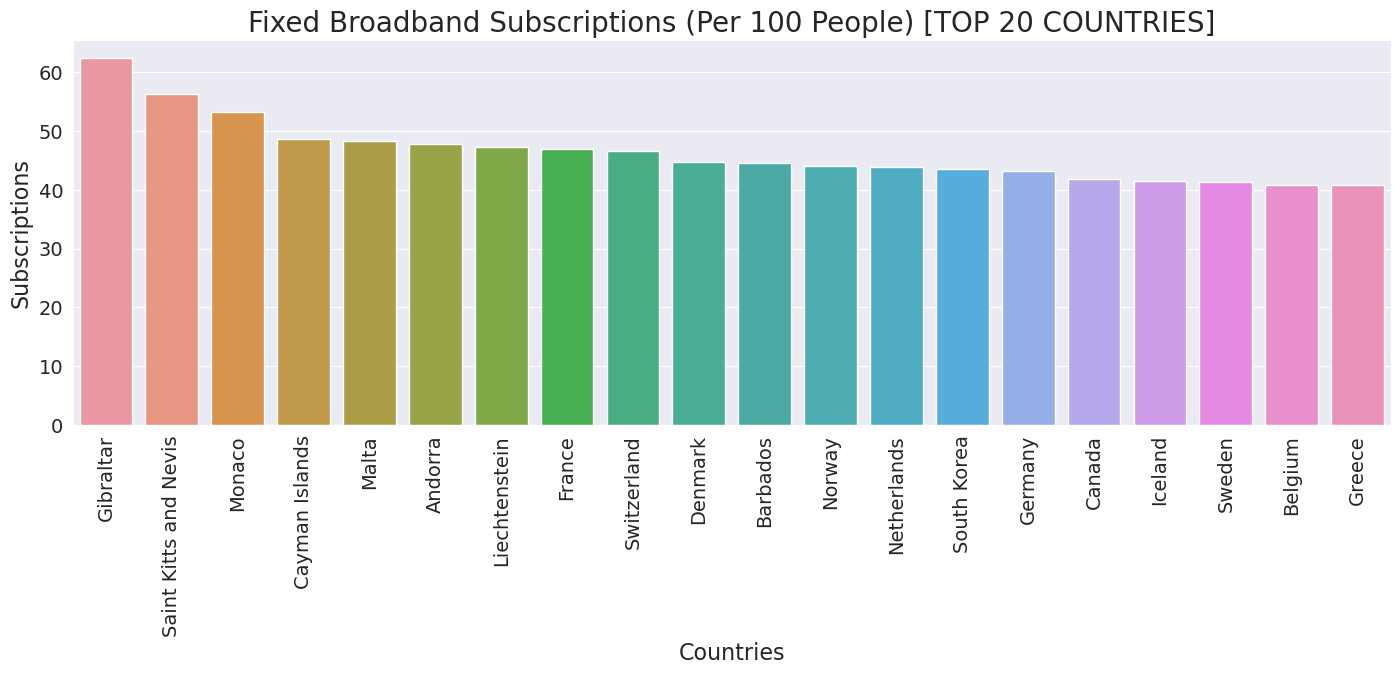

In [7]:
sns.barplot(x='Entity', y='Fixed broadband subscriptions (per 100 people)', data=broadband_head)

plt.xlabel('Countries', fontsize=16)
plt.ylabel('Subscriptions', fontsize=16)
plt.xticks(rotation=90)
plt.title('Fixed Broadband Subscriptions (Per 100 People) [TOP 20 COUNTRIES]', fontsize=20)

plt.show();

In [8]:
broadband_head

,Entity,Year,Fixed broadband subscriptions (per 100 people)
0,Gibraltar,2020,62.357899
1,Saint Kitts and Nevis,2020,56.392036
2,Monaco,2020,53.200653
3,Cayman Islands,2020,48.689938
4,Malta,2020,48.334816
5,Andorra,2020,47.887142
6,Liechtenstein,2020,47.340538
7,France,2020,46.921024
8,Switzerland,2020,46.544353
9,Denmark,2020,44.720161


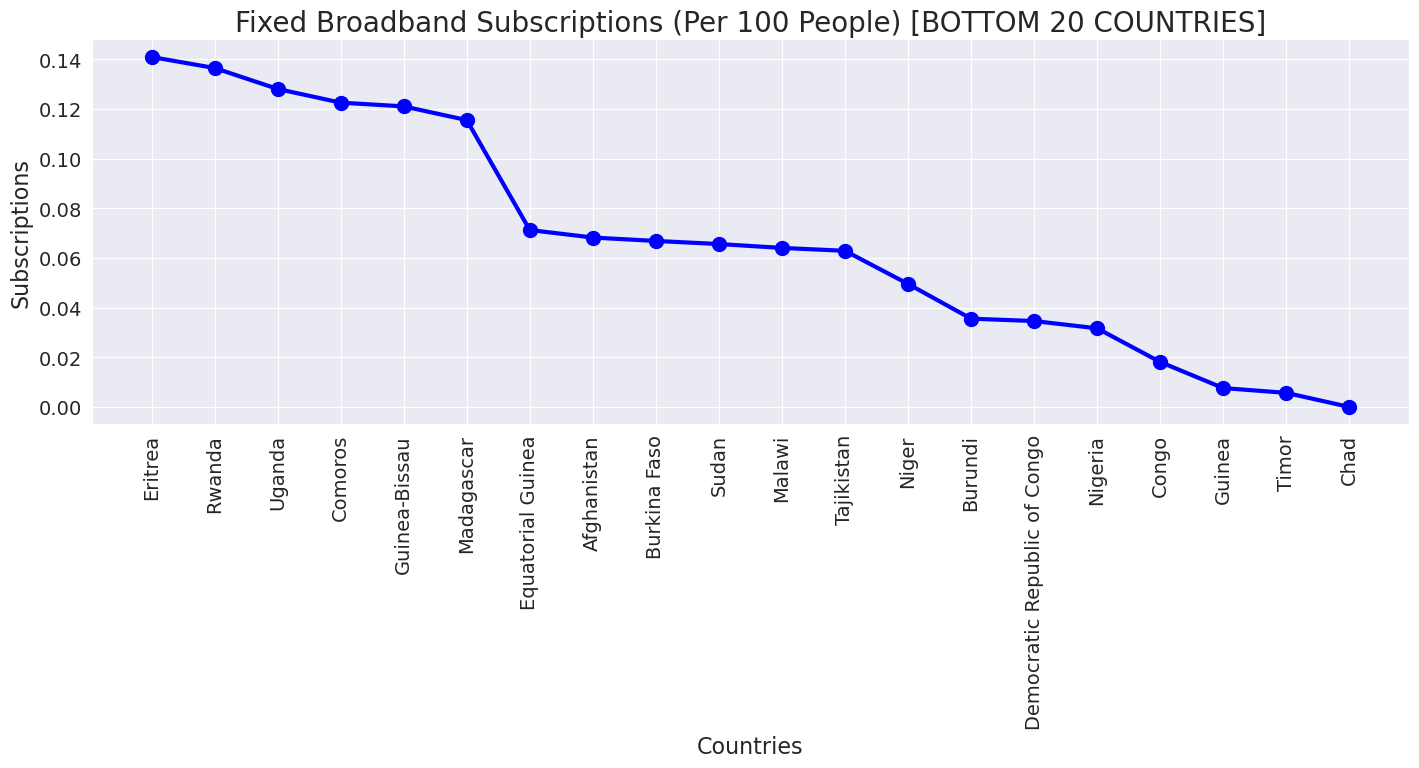

In [9]:
plt.plot(broadband_tail['Entity'], broadband_tail['Fixed broadband subscriptions (per 100 people)'], 'o-b', lw=3, ms=10)

plt.xlabel('Countries', fontsize=16)
plt.ylabel('Subscriptions', fontsize=16)
plt.xticks(rotation=90)
plt.title('Fixed Broadband Subscriptions (Per 100 People) [BOTTOM 20 COUNTRIES]', fontsize=20)

plt.show();

In [10]:
broadband_tail

,Entity,Year,Fixed broadband subscriptions (per 100 people)
0,Eritrea,2020,0.140987
1,Rwanda,2020,0.136540
2,Uganda,2020,0.128100
3,Comoros,2020,0.122585
4,Guinea-Bissau,2020,0.121087
5,Madagascar,2020,0.115561
6,Equatorial Guinea,2020,0.071277
7,Afghanistan,2020,0.068254
8,Burkina Faso,2020,0.066875
9,Sudan,2020,0.065639


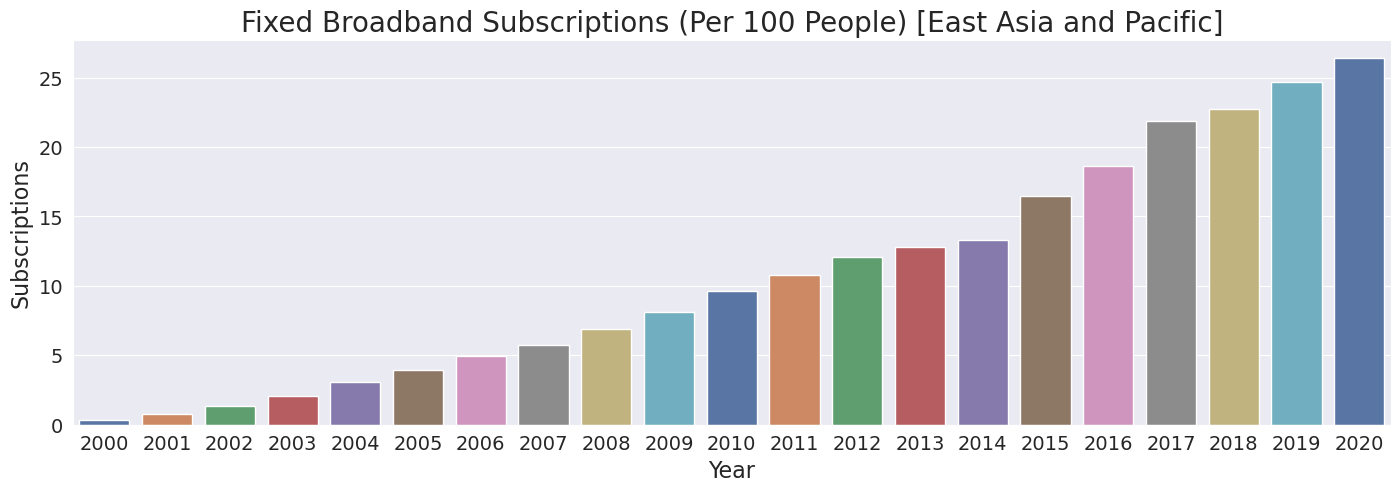

In [11]:
sns.barplot(x='Year', y='Fixed broadband subscriptions (per 100 people)', data=broadband_eap, palette='deep')

plt.xlabel('Year', fontsize=16)
plt.ylabel('Subscriptions', fontsize=16)
plt.title('Fixed Broadband Subscriptions (Per 100 People) [East Asia and Pacific]', fontsize=20)

plt.show();

In [12]:
broadband_eap

,Entity,Year,Fixed broadband subscriptions (per 100 people)
0,East Asia and Pacific,2000,0.321039
1,East Asia and Pacific,2001,0.739900
2,East Asia and Pacific,2002,1.372659
3,East Asia and Pacific,2003,2.097008
4,East Asia and Pacific,2004,3.109128
5,East Asia and Pacific,2005,3.919807
6,East Asia and Pacific,2006,4.924325
7,East Asia and Pacific,2007,5.751167
8,East Asia and Pacific,2008,6.896633
9,East Asia and Pacific,2009,8.145584


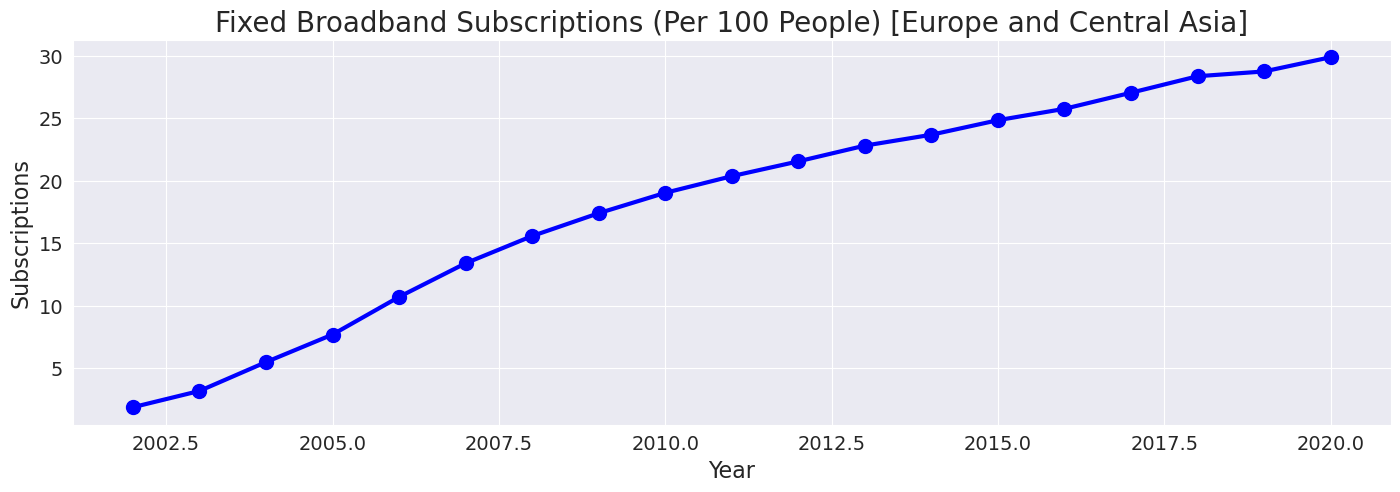

In [13]:
plt.plot(broadband_eca['Year'], broadband_eca['Fixed broadband subscriptions (per 100 people)'], 'o-b', lw=3, ms=10)

plt.xlabel('Year', fontsize=16)
plt.ylabel('Subscriptions', fontsize=16)
plt.title('Fixed Broadband Subscriptions (Per 100 People) [Europe and Central Asia]', fontsize=20)

plt.show();

In [14]:
broadband_eca

,Entity,Year,Fixed broadband subscriptions (per 100 people)
0,Europe and Central Asia,2002,1.892228
1,Europe and Central Asia,2003,3.192079
2,Europe and Central Asia,2004,5.498925
3,Europe and Central Asia,2005,7.701233
4,Europe and Central Asia,2006,10.709927
5,Europe and Central Asia,2007,13.399825
6,Europe and Central Asia,2008,15.576349
7,Europe and Central Asia,2009,17.400728
8,Europe and Central Asia,2010,19.029886
9,Europe and Central Asia,2011,20.359007


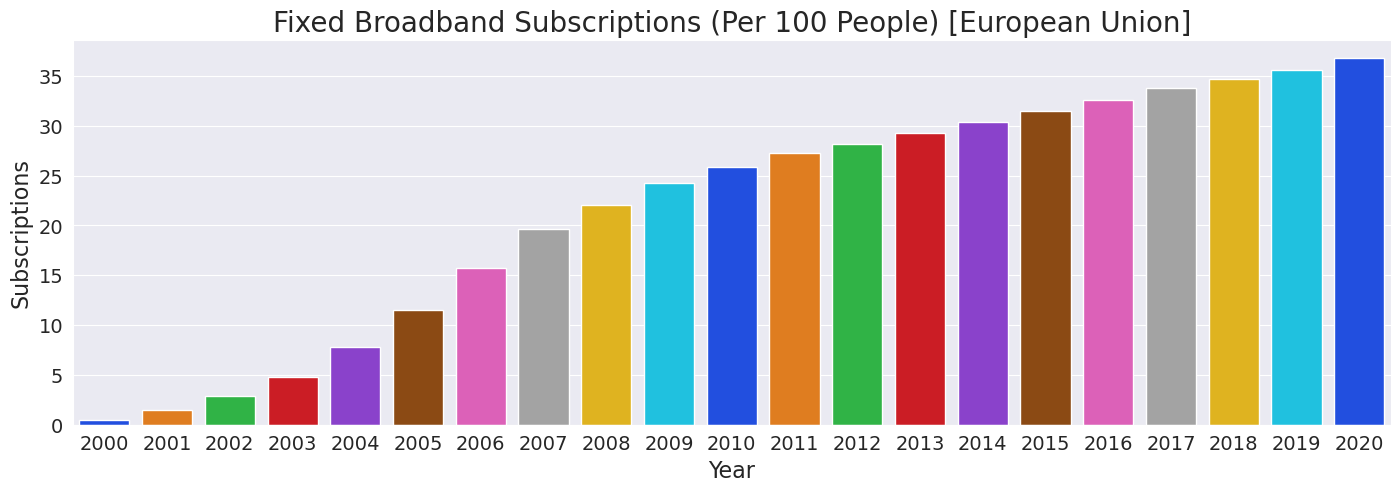

In [15]:
sns.barplot(x='Year', y='Fixed broadband subscriptions (per 100 people)', data=broadband_eu, palette='bright')

plt.xlabel('Year', fontsize=16)
plt.ylabel('Subscriptions', fontsize=16)
plt.title('Fixed Broadband Subscriptions (Per 100 People) [European Union]', fontsize=20)

plt.show();

In [16]:
broadband_eu

,Entity,Year,Fixed broadband subscriptions (per 100 people)
0,European Union,2000,0.501734
1,European Union,2001,1.508933
2,European Union,2002,2.874377
3,European Union,2003,4.752099
4,European Union,2004,7.842469
5,European Union,2005,11.535940
6,European Union,2006,15.762174
7,European Union,2007,19.616304
8,European Union,2008,22.092190
9,European Union,2009,24.278170


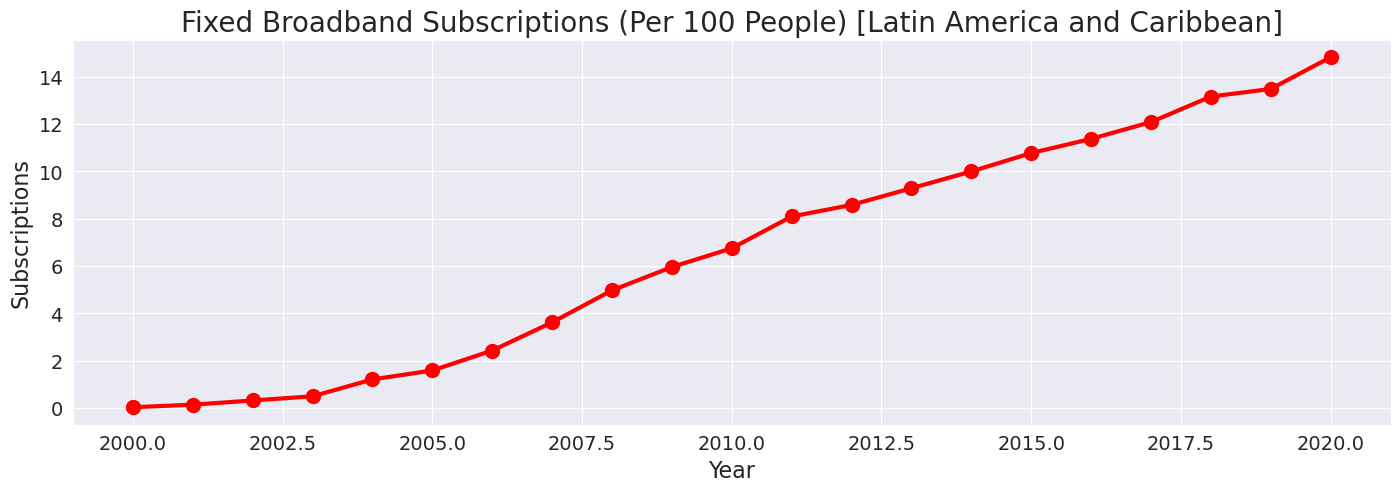

In [17]:
plt.plot(broadband_lac['Year'], broadband_lac['Fixed broadband subscriptions (per 100 people)'], 'o-r', lw=3, ms=10)

plt.xlabel('Year', fontsize=16)
plt.ylabel('Subscriptions', fontsize=16)
plt.title('Fixed Broadband Subscriptions (Per 100 People) [Latin America and Caribbean]', fontsize=20)

plt.show();

In [18]:
broadband_lac

,Entity,Year,Fixed broadband subscriptions (per 100 people)
0,Latin America and Caribbean,2000,0.035413
1,Latin America and Caribbean,2001,0.143387
2,Latin America and Caribbean,2002,0.320632
3,Latin America and Caribbean,2003,0.496933
4,Latin America and Caribbean,2004,1.211335
5,Latin America and Caribbean,2005,1.587966
6,Latin America and Caribbean,2006,2.430825
7,Latin America and Caribbean,2007,3.621901
8,Latin America and Caribbean,2008,4.974736
9,Latin America and Caribbean,2009,5.960544


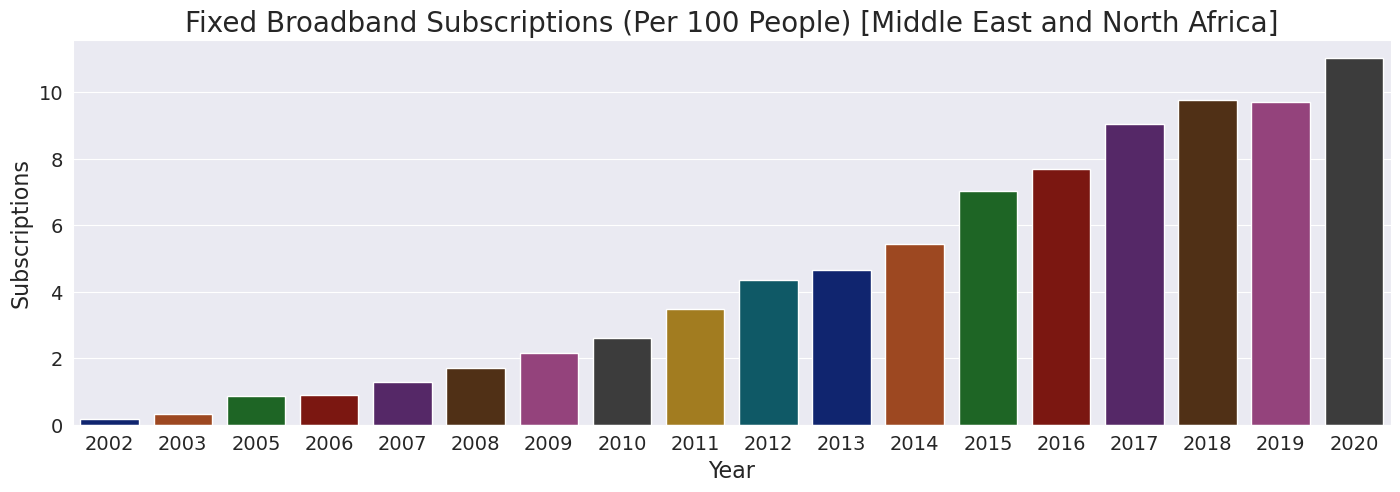

In [19]:
sns.barplot(x='Year', y='Fixed broadband subscriptions (per 100 people)', data=broadband_mena, palette='dark')

plt.xlabel('Year', fontsize=16)
plt.ylabel('Subscriptions', fontsize=16)
plt.title('Fixed Broadband Subscriptions (Per 100 People) [Middle East and North Africa]', fontsize=20)

plt.show();

In [20]:
broadband_mena

,Entity,Year,Fixed broadband subscriptions (per 100 people)
0,Middle East and North Africa,2002,0.172038
1,Middle East and North Africa,2003,0.327776
2,Middle East and North Africa,2005,0.876170
3,Middle East and North Africa,2006,0.894749
4,Middle East and North Africa,2007,1.286333
5,Middle East and North Africa,2008,1.712578
6,Middle East and North Africa,2009,2.159715
7,Middle East and North Africa,2010,2.613457
8,Middle East and North Africa,2011,3.489542
9,Middle East and North Africa,2012,4.358191


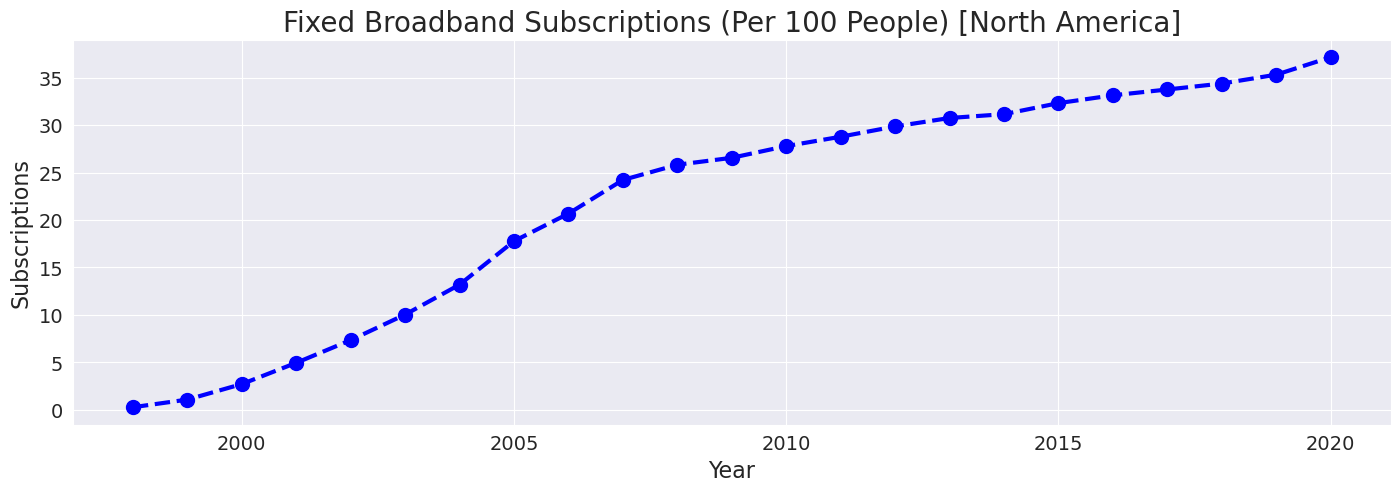

In [21]:
plt.plot(broadband_na['Year'], broadband_na['Fixed broadband subscriptions (per 100 people)'], 'o--b', lw=3, ms=10)

plt.xlabel('Year', fontsize=16)
plt.ylabel('Subscriptions', fontsize=16)
plt.title('Fixed Broadband Subscriptions (Per 100 People) [North America]', fontsize=20)

plt.show();

In [22]:
broadband_na

,Entity,Year,Fixed broadband subscriptions (per 100 people)
0,North America,1998,0.277165
1,North America,1999,1.080226
2,North America,2000,2.715602
3,North America,2001,4.953852
4,North America,2002,7.346834
5,North America,2003,10.039520
6,North America,2004,13.193232
7,North America,2005,17.779510
8,North America,2006,20.675896
9,North America,2007,24.222670


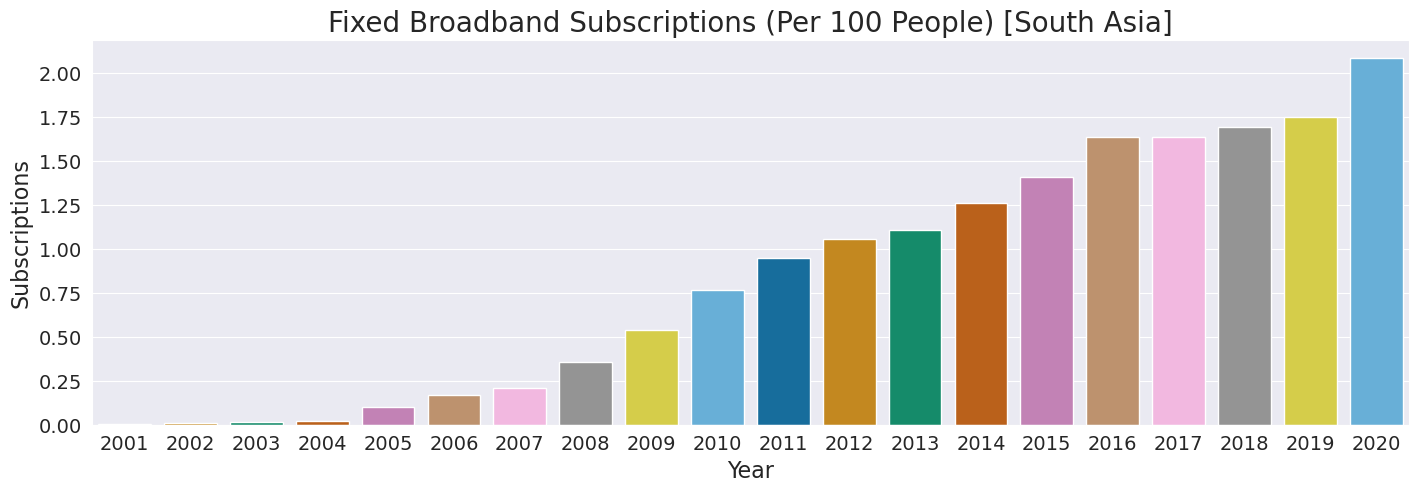

In [23]:
sns.barplot(x='Year', y='Fixed broadband subscriptions (per 100 people)', data=broadband_sa, palette='colorblind')

plt.xlabel('Year', fontsize=16)
plt.ylabel('Subscriptions', fontsize=16)
plt.title('Fixed Broadband Subscriptions (Per 100 People) [South Asia]', fontsize=20)

plt.show();

In [24]:
broadband_sa

,Entity,Year,Fixed broadband subscriptions (per 100 people)
0,South Asia,2001,0.004601
1,South Asia,2002,0.007477
2,South Asia,2003,0.012756
3,South Asia,2004,0.021836
4,South Asia,2005,0.102486
5,South Asia,2006,0.168130
6,South Asia,2007,0.210802
7,South Asia,2008,0.353636
8,South Asia,2009,0.536050
9,South Asia,2010,0.763262


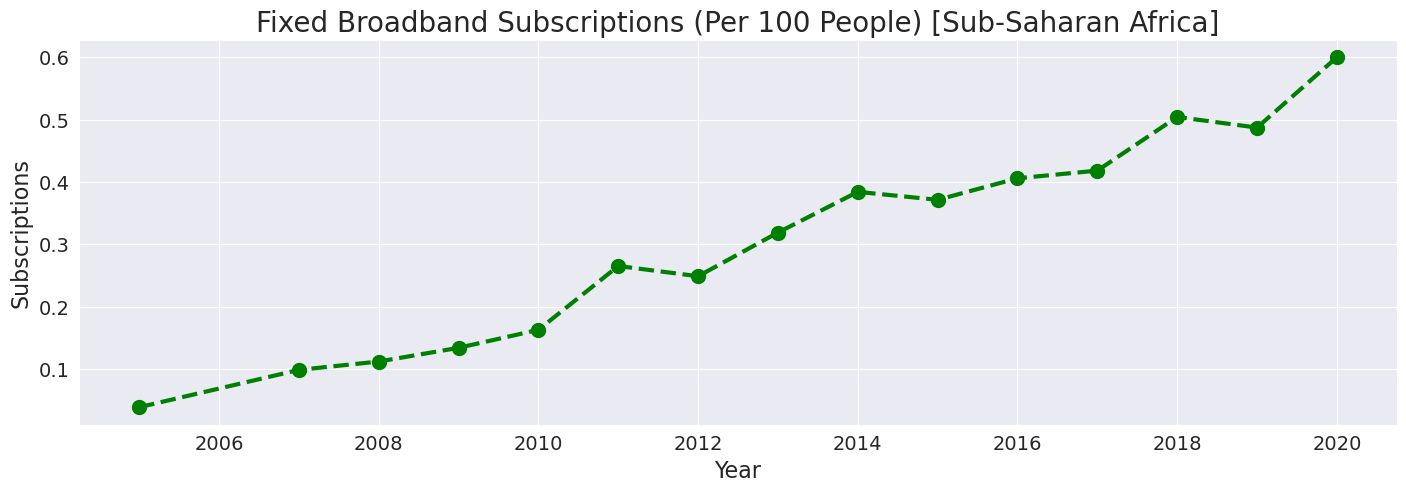

In [25]:
plt.plot(broadband_ssa['Year'], broadband_ssa['Fixed broadband subscriptions (per 100 people)'], 'o--g', lw=3, ms=10)

plt.xlabel('Year', fontsize=16)
plt.ylabel('Subscriptions', fontsize=16)
plt.title('Fixed Broadband Subscriptions (Per 100 People) [Sub-Saharan Africa]', fontsize=20)

plt.show();

In [26]:
broadband_ssa

,Entity,Year,Fixed broadband subscriptions (per 100 people)
0,Sub-Saharan Africa,2005,0.038895
1,Sub-Saharan Africa,2007,0.098752
2,Sub-Saharan Africa,2008,0.112162
3,Sub-Saharan Africa,2009,0.134110
4,Sub-Saharan Africa,2010,0.162958
5,Sub-Saharan Africa,2011,0.265299
6,Sub-Saharan Africa,2012,0.248918
7,Sub-Saharan Africa,2013,0.318944
8,Sub-Saharan Africa,2014,0.384200
9,Sub-Saharan Africa,2015,0.371435


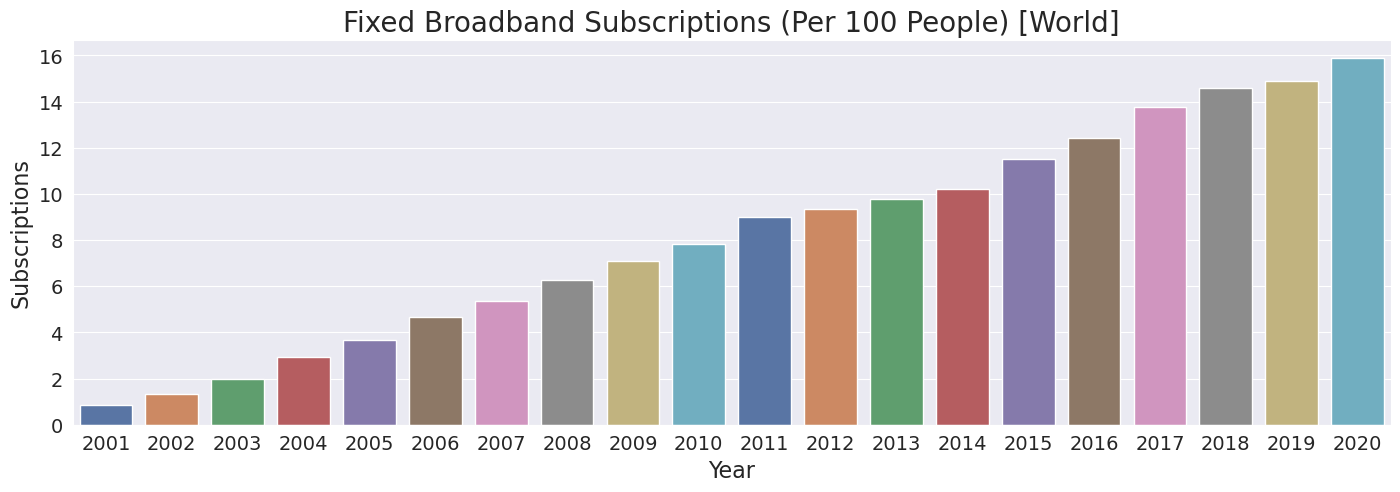

In [27]:
sns.barplot(x='Year', y='Fixed broadband subscriptions (per 100 people)', data=broadband_wor, palette='deep')

plt.xlabel('Year', fontsize=16)
plt.ylabel('Subscriptions', fontsize=16)
plt.title('Fixed Broadband Subscriptions (Per 100 People) [World]', fontsize=20)

plt.show();

In [28]:
broadband_wor

,Entity,Year,Fixed broadband subscriptions (per 100 people)
0,World,2001,0.837601
1,World,2002,1.342418
2,World,2003,1.975955
3,World,2004,2.943473
4,World,2005,3.658811
5,World,2006,4.653306
6,World,2007,5.371134
7,World,2008,6.259034
8,World,2009,7.098287
9,World,2010,7.848253


# Internet Users

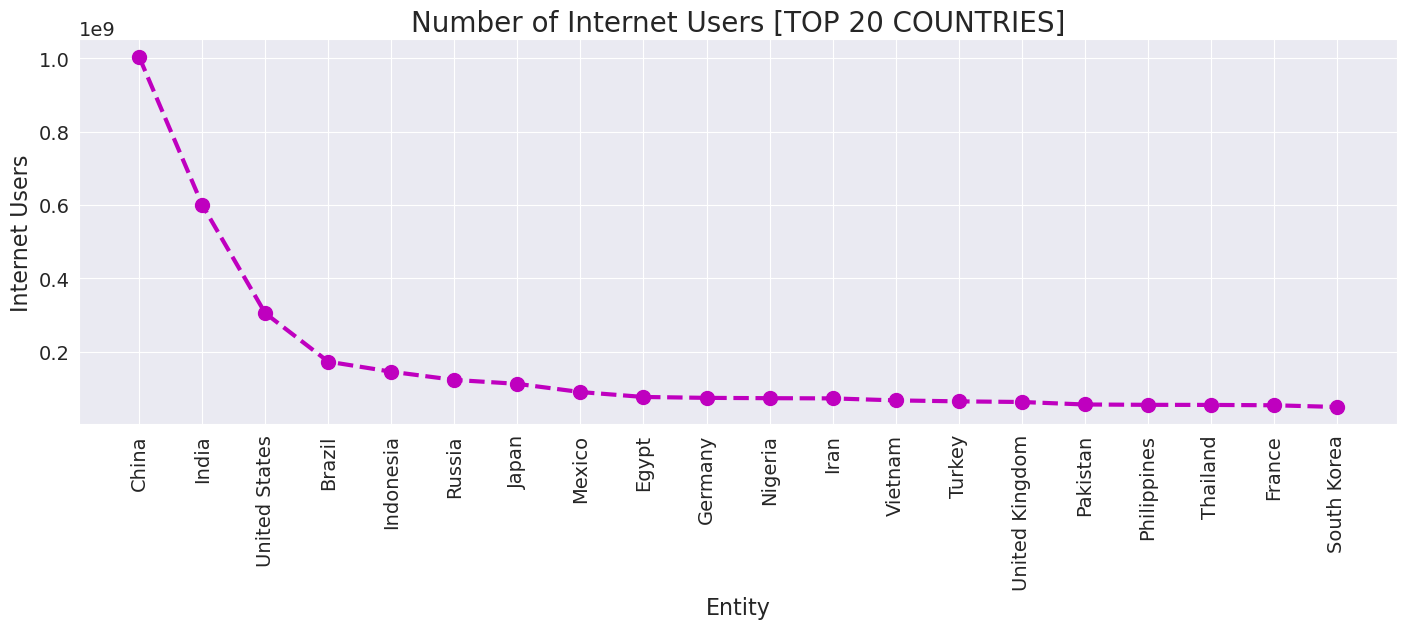

In [29]:
plt.plot(internet_head['Entity'], internet_head['Number of Internet users'], 'o--m', lw=3, ms=10)

plt.xlabel('Entity', fontsize=16)
plt.ylabel('Internet Users', fontsize=16)
plt.xticks(rotation=90)
plt.title('Number of Internet Users [TOP 20 COUNTRIES]', fontsize=20)

plt.show();

In [30]:
internet_head

,Entity,Year,Number of Internet users
0,China,2020,1003218650
1,India,2020,600446441
2,United States,2020,305371298
3,Brazil,2020,173419624
4,Indonesia,2020,146059763
5,Russia,2020,123766963
6,Japan,2020,112995146
7,Mexico,2020,90678697
8,Egypt,2020,77282687
9,Germany,2020,74840220


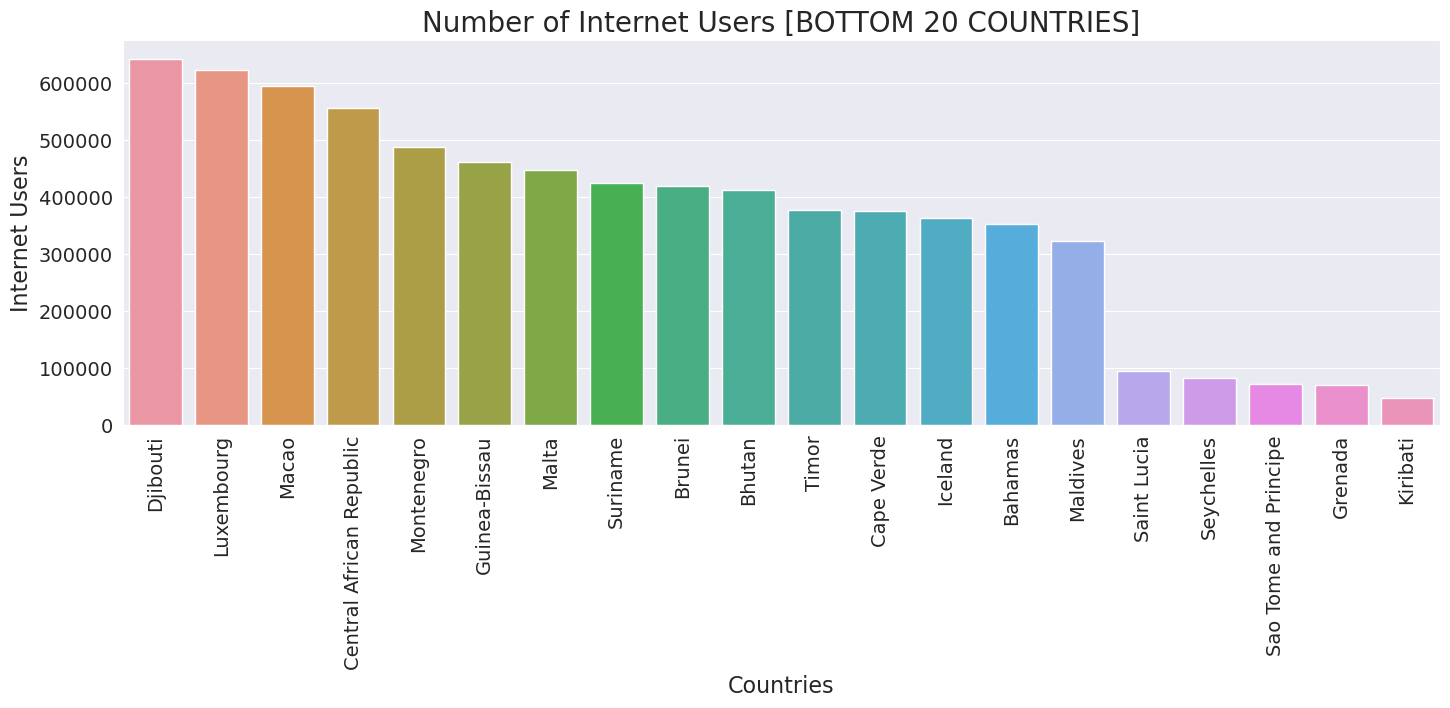

In [31]:
sns.barplot(x='Entity', y='Number of Internet users', data=internet_tail)

plt.xlabel('Countries', fontsize=16)
plt.ylabel('Internet Users', fontsize=16)
plt.xticks(rotation=90)
plt.title('Number of Internet Users [BOTTOM 20 COUNTRIES]', fontsize=20)

plt.show();

In [32]:
internet_tail

,Entity,Year,Number of Internet users
0,Djibouti,2020,643196
1,Luxembourg,2020,622978
2,Macao,2020,595809
3,Central African Republic,2020,555674
4,Montenegro,2020,488204
5,Guinea-Bissau,2020,461627
6,Malta,2020,447639
7,Suriname,2020,425312
8,Brunei,2020,419649
9,Bhutan,2020,413294


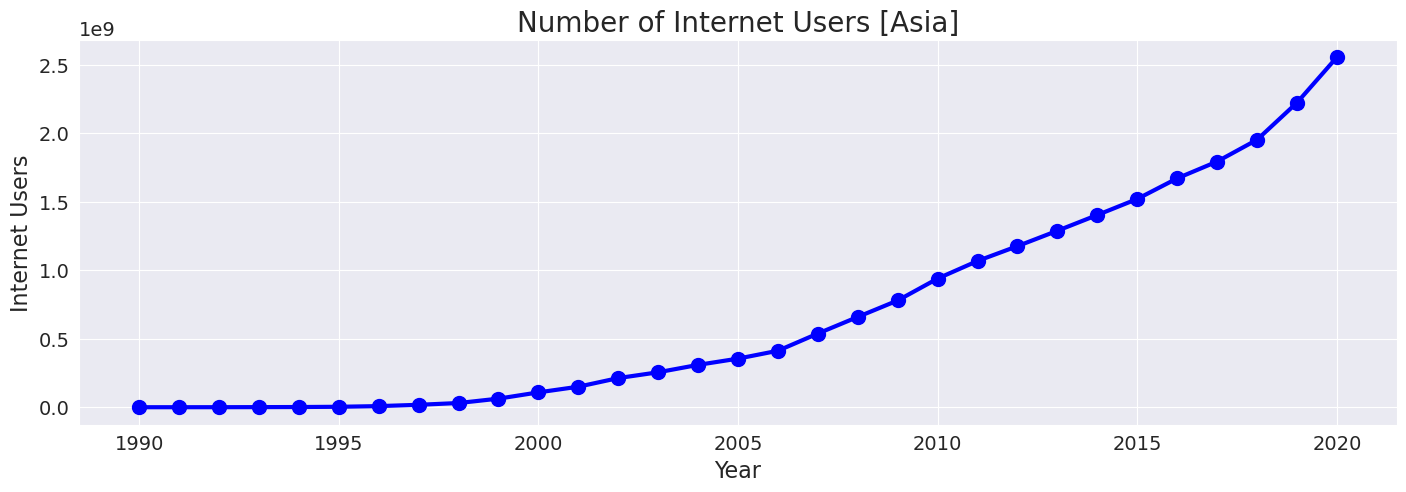

In [33]:
plt.plot(internet_asia['Year'], internet_asia['Number of Internet users'], 'o-b', lw=3, ms=10)

plt.xlabel('Year', fontsize=16)
plt.ylabel('Internet Users', fontsize=16)
plt.title('Number of Internet Users [Asia]', fontsize=20)

plt.show();

In [34]:
internet_asia

,Entity,Year,Number of Internet users
0,Asia,1990,40687
1,Asia,1991,93535
2,Asia,1992,247731
3,Asia,1993,763635
4,Asia,1994,1489801
5,Asia,1995,3260653
6,Asia,1996,8197243
7,Asia,1997,17670153
8,Asia,1998,30690361
9,Asia,1999,62646469


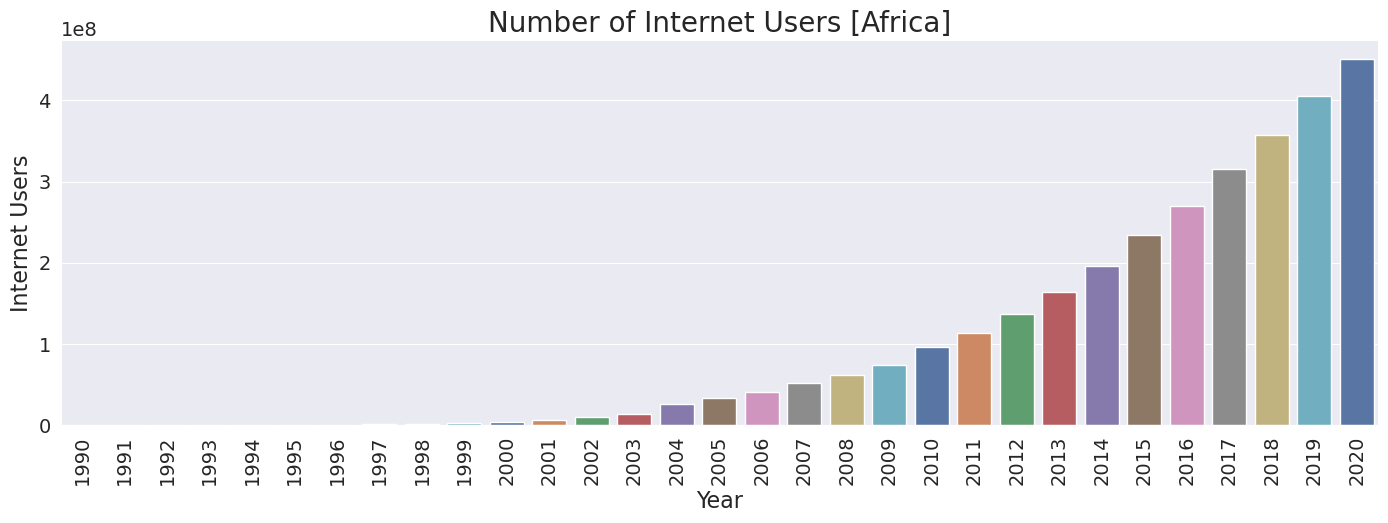

In [35]:
sns.barplot(x='Year', y='Number of Internet users', data=internet_africa, palette='deep')

plt.xlabel('Year', fontsize=16)
plt.ylabel('Internet Users', fontsize=16)
plt.xticks(rotation=90)
plt.title('Number of Internet Users [Africa]', fontsize=20)

plt.show();

In [36]:
internet_africa

,Entity,Year,Number of Internet users
0,Africa,1990,0
1,Africa,1991,5434
2,Africa,1992,16232
3,Africa,1993,48970
4,Africa,1994,112387
5,Africa,1995,324226
6,Africa,1996,451060
7,Africa,1997,905601
8,Africa,1998,1703531
9,Africa,1999,2901046


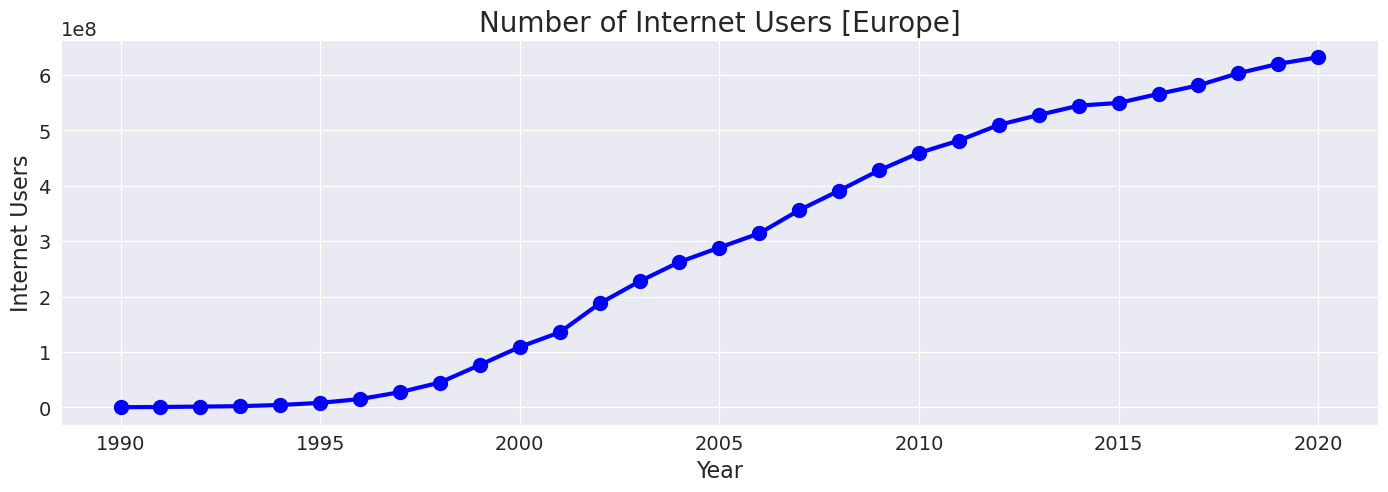

In [37]:
plt.plot(internet_europe['Year'], internet_europe['Number of Internet users'], 'o-b', lw=3, ms=10)

plt.xlabel('Year', fontsize=16)
plt.ylabel('Internet Users', fontsize=16)
plt.title('Number of Internet Users [Europe]', fontsize=20)

plt.show();

In [38]:
internet_europe

,Entity,Year,Number of Internet users
0,Europe,1990,399647
1,Europe,1991,851729
2,Europe,1992,1516045
3,Europe,1993,2349541
4,Europe,1994,4395044
5,Europe,1995,8317883
6,Europe,1996,15143350
7,Europe,1997,27566810
8,Europe,1998,44974450
9,Europe,1999,76721973


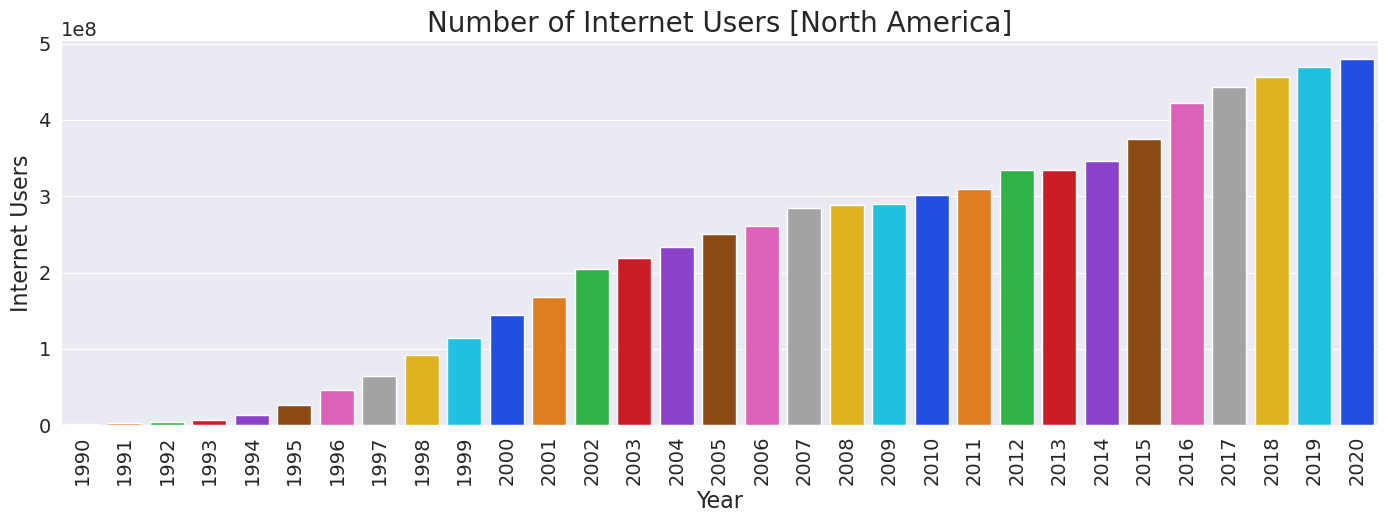

In [39]:
sns.barplot(x='Year', y='Number of Internet users', data=internet_nam, palette='bright')

plt.xlabel('Year', fontsize=16)
plt.ylabel('Internet Users', fontsize=16)
plt.xticks(rotation=90)
plt.title('Number of Internet Users [North America]', fontsize=20)

plt.show();

In [40]:
internet_nam

,Entity,Year,Number of Internet users
0,North America,1990,2046626
1,North America,1991,3090832
2,North America,1992,4674145
3,North America,1993,6245523
4,North America,1994,13494936
5,North America,1995,25896301
6,North America,1996,46471992
7,North America,1997,64240918
8,North America,1998,92305573
9,North America,1999,113888012


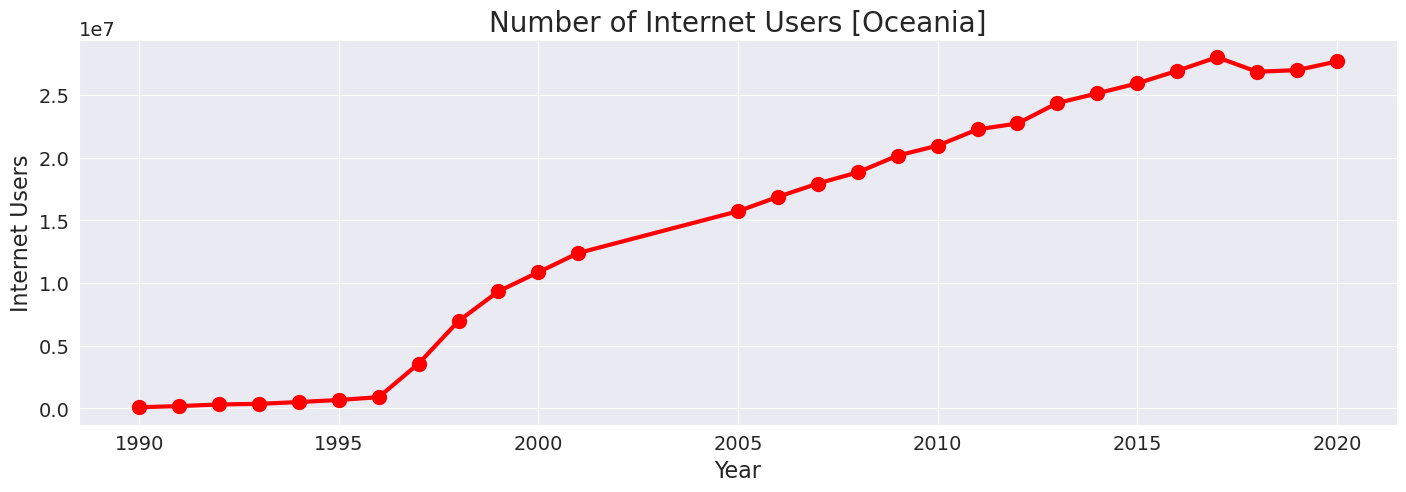

In [41]:
plt.plot(internet_oce['Year'], internet_oce['Number of Internet users'], 'o-r', lw=3, ms=10)

plt.xlabel('Year', fontsize=16)
plt.ylabel('Internet Users', fontsize=16)
plt.title('Number of Internet Users [Oceania]', fontsize=20)

plt.show();

In [42]:
internet_oce

,Entity,Year,Number of Internet users
0,Oceania,1990,99747
1,Oceania,1991,189499
2,Oceania,1992,318972
3,Oceania,1993,370765
4,Oceania,1994,512751
5,Oceania,1995,677551
6,Oceania,1996,901357
7,Oceania,1997,3581219
8,Oceania,1998,6975084
9,Oceania,1999,9345328


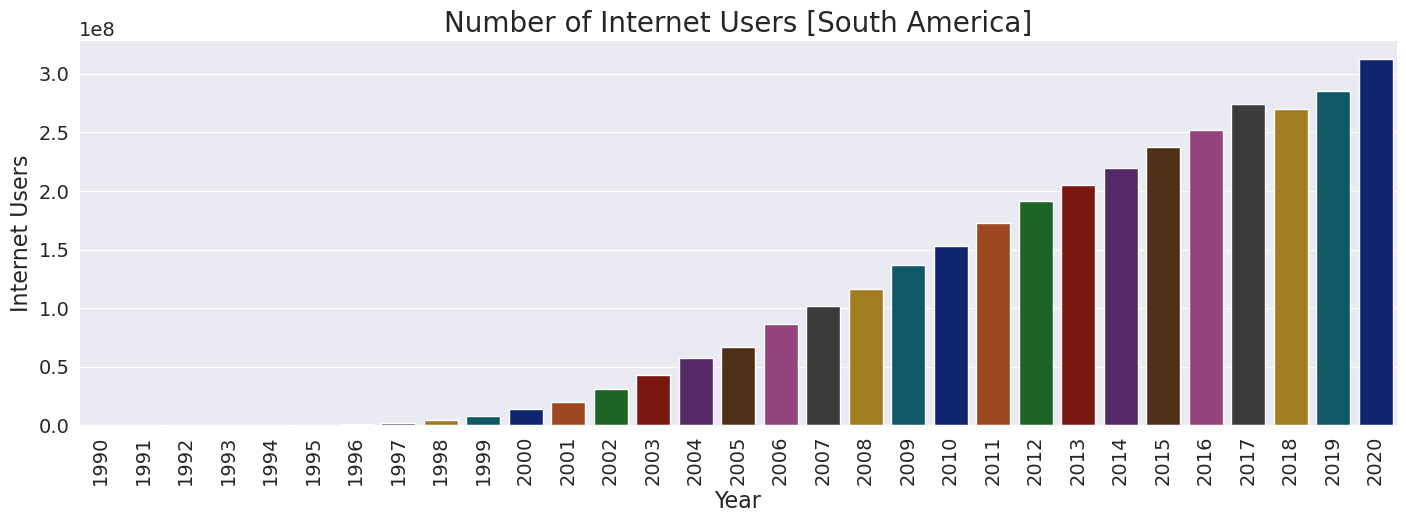

In [43]:
sns.barplot(x='Year', y='Number of Internet users', data=internet_sam, palette='dark')

plt.xlabel('Year', fontsize=16)
plt.ylabel('Internet Users', fontsize=16)
plt.xticks(rotation=90)
plt.title('Number of Internet Users [South America]', fontsize=20)

plt.show();

In [44]:
internet_sam

,Entity,Year,Number of Internet users
0,South America,1990,0
1,South America,1991,5042
2,South America,1992,29285
3,South America,1993,71126
4,South America,1994,153591
5,South America,1995,375674
6,South America,1996,1224751
7,South America,1997,2148695
8,South America,1998,4452498
9,South America,1999,7754970


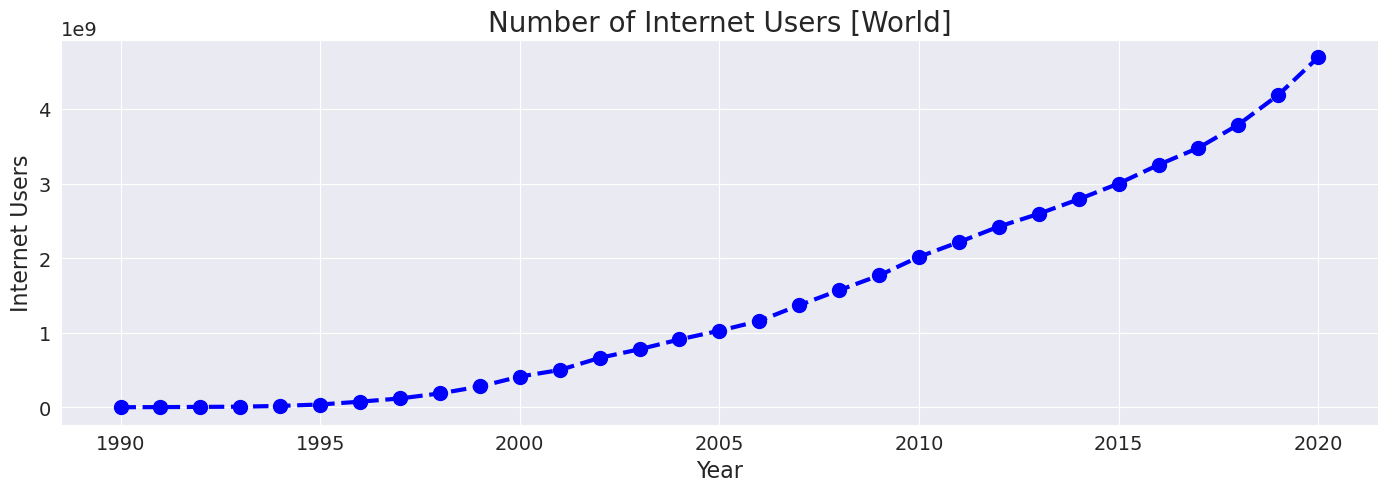

In [45]:
plt.plot(internet_wor['Year'], internet_wor['Number of Internet users'], 'o--b', lw=3, ms=10)

plt.xlabel('Year', fontsize=16)
plt.ylabel('Internet Users', fontsize=16)
plt.title('Number of Internet Users [World]', fontsize=20)

plt.show();

In [46]:
internet_wor

,Entity,Year,Number of Internet users
0,World,1990,2617438
1,World,1991,4280727
2,World,1992,6885825
3,World,1993,9978025
4,World,1994,20372971
5,World,1995,39137572
6,World,1996,77094037
7,World,1997,120463190
8,World,1998,187786430
9,World,1999,280906271


# Mobile Cellular Subscriptions

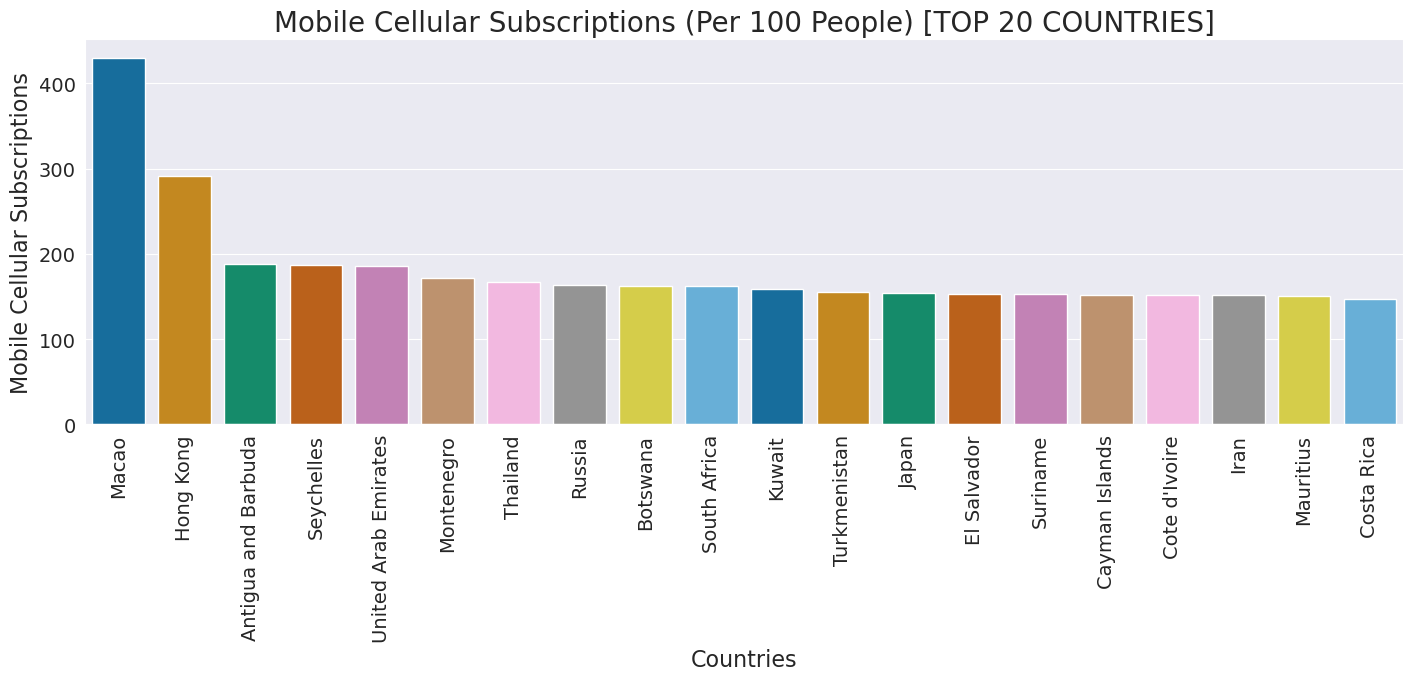

In [47]:
sns.barplot(x='Entity', y='Mobile cellular subscriptions (per 100 people)', data=mobile_head, palette='colorblind')

plt.xlabel('Countries', fontsize=16)
plt.ylabel('Mobile Cellular Subscriptions', fontsize=16)
plt.xticks(rotation=90)
plt.title('Mobile Cellular Subscriptions (Per 100 People) [TOP 20 COUNTRIES]', fontsize=20)

plt.show();

In [48]:
mobile_head

,Entity,Year,Mobile cellular subscriptions (per 100 people)
0,Macao,2020,430.132355
1,Hong Kong,2020,291.653595
2,Antigua and Barbuda,2020,187.891220
3,Seychelles,2020,186.582199
4,United Arab Emirates,2020,185.779419
5,Montenegro,2020,171.970627
6,Thailand,2020,166.610367
7,Russia,2020,163.589340
8,Botswana,2020,162.840790
9,South Africa,2020,161.796585


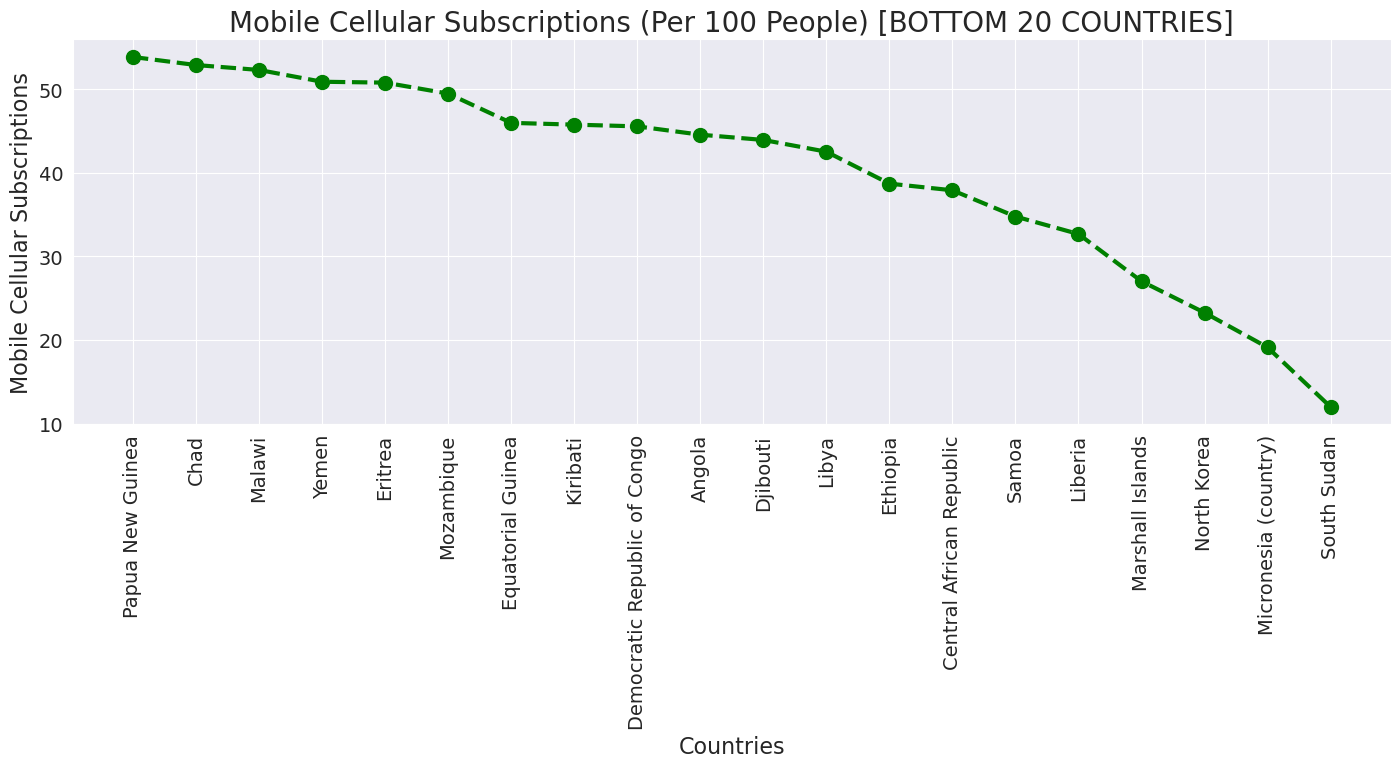

In [49]:
plt.plot(mobile_tail['Entity'], mobile_tail['Mobile cellular subscriptions (per 100 people)'], 'o--g', lw=3, ms=10)

plt.xlabel('Countries', fontsize=16)
plt.ylabel('Mobile Cellular Subscriptions', fontsize=16)
plt.xticks(rotation=90)
plt.title('Mobile Cellular Subscriptions (Per 100 People) [BOTTOM 20 COUNTRIES]', fontsize=20)

plt.show();

In [50]:
mobile_tail

,Entity,Year,Mobile cellular subscriptions (per 100 people)
0,Papua New Guinea,2020,53.850307
1,Chad,2020,52.887028
2,Malawi,2020,52.298512
3,Yemen,2020,50.888550
4,Eritrea,2020,50.783592
5,Mozambique,2020,49.473721
6,Equatorial Guinea,2020,45.973408
7,Kiribati,2020,45.760952
8,Democratic Republic of Congo,2020,45.553547
9,Angola,2020,44.559509


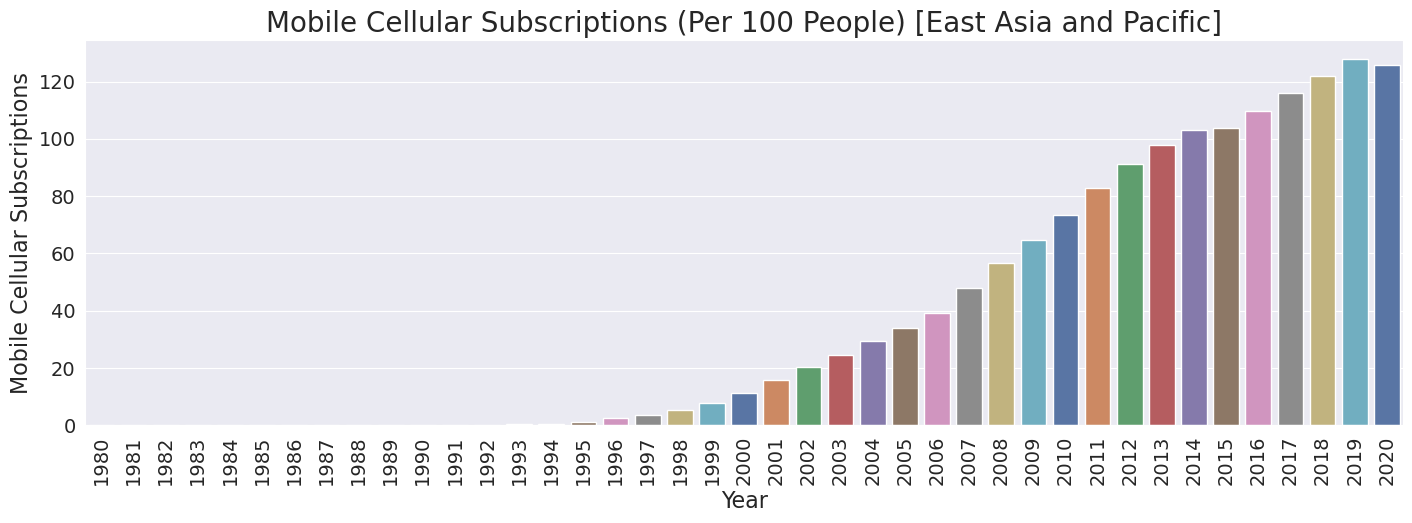

In [51]:
sns.barplot(x='Year', y='Mobile cellular subscriptions (per 100 people)', data=mobile_eap, palette='deep')

plt.xlabel('Year', fontsize=16)
plt.ylabel('Mobile Cellular Subscriptions', fontsize=16)
plt.xticks(rotation=90)
plt.title('Mobile Cellular Subscriptions (Per 100 People) [East Asia and Pacific]', fontsize=20)

plt.show();

In [52]:
mobile_eap

,Entity,Year,Mobile cellular subscriptions (per 100 people)
0,East Asia and Pacific,1980,0.000000
1,East Asia and Pacific,1981,0.000828
2,East Asia and Pacific,1982,0.001216
3,East Asia and Pacific,1983,0.001645
4,East Asia and Pacific,1984,0.002634
5,East Asia and Pacific,1985,0.004135
6,East Asia and Pacific,1986,0.007392
7,East Asia and Pacific,1987,0.012791
8,East Asia and Pacific,1988,0.023508
9,East Asia and Pacific,1989,0.049540


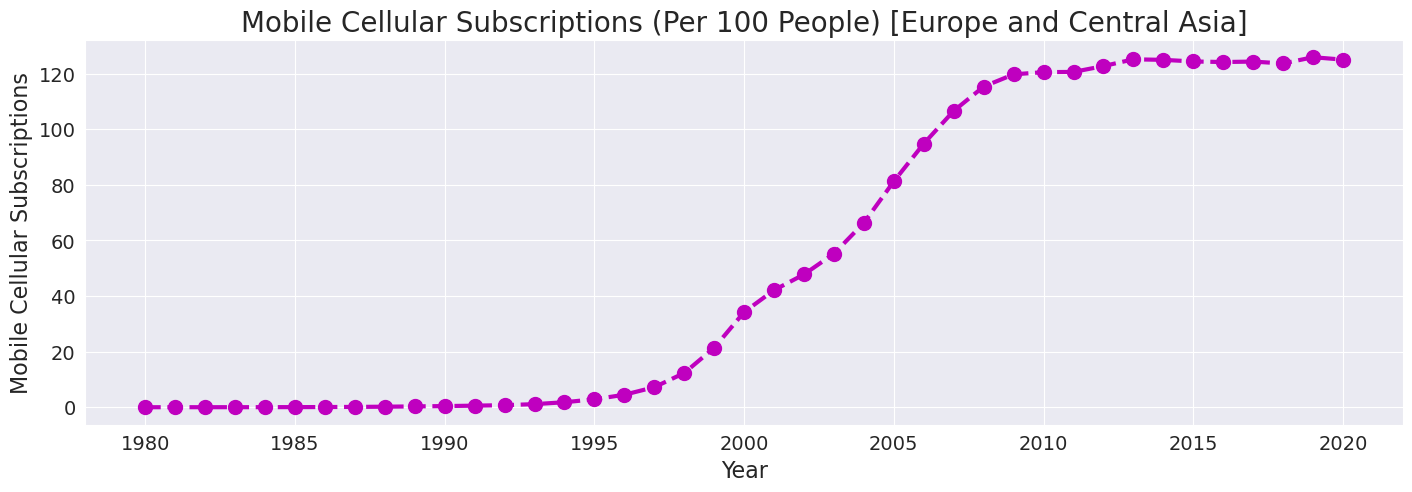

In [53]:
plt.plot(mobile_eca['Year'], mobile_eca['Mobile cellular subscriptions (per 100 people)'], 'o--m', lw=3, ms=10)

plt.xlabel('Year', fontsize=16)
plt.ylabel('Mobile Cellular Subscriptions', fontsize=16)
plt.title('Mobile Cellular Subscriptions (Per 100 People) [Europe and Central Asia]', fontsize=20)

plt.show();

In [54]:
mobile_eca

,Entity,Year,Mobile cellular subscriptions (per 100 people)
0,Europe and Central Asia,1980,0.002997
1,Europe and Central Asia,1981,0.006382
2,Europe and Central Asia,1982,0.010008
3,Europe and Central Asia,1983,0.015549
4,Europe and Central Asia,1984,0.023954
5,Europe and Central Asia,1985,0.041909
6,Europe and Central Asia,1986,0.068818
7,Europe and Central Asia,1987,0.116465
8,Europe and Central Asia,1988,0.192170
9,Europe and Central Asia,1989,0.301797


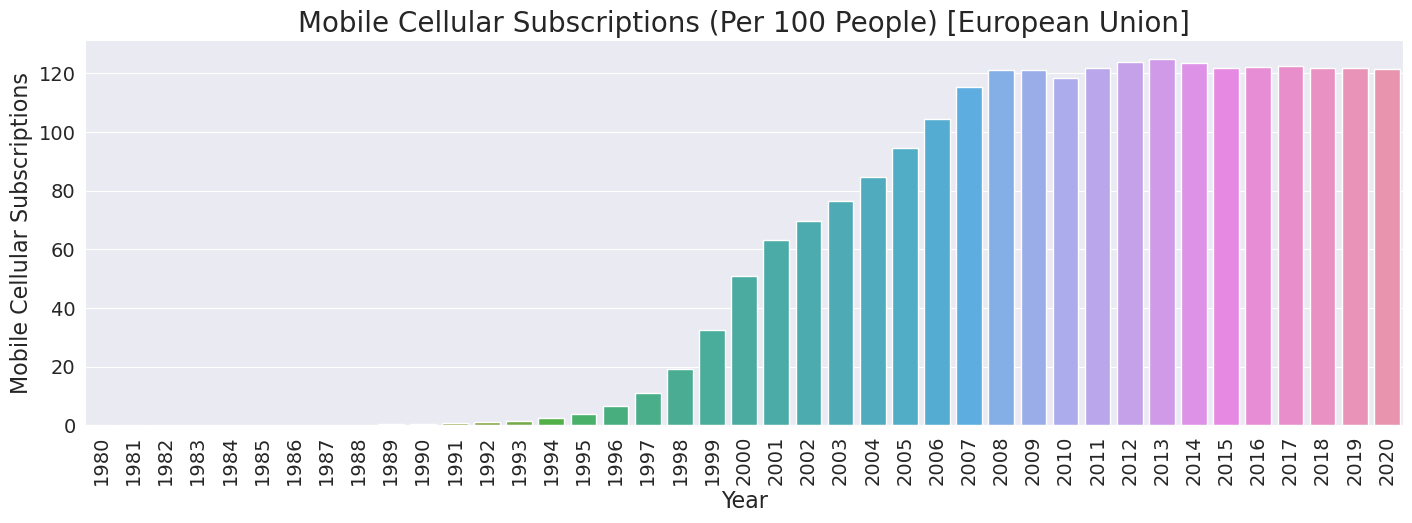

In [55]:
sns.barplot(x='Year', y='Mobile cellular subscriptions (per 100 people)', data=mobile_eu)

plt.xlabel('Year', fontsize=16)
plt.ylabel('Mobile Cellular Subscriptions', fontsize=16)
plt.xticks(rotation=90)
plt.title('Mobile Cellular Subscriptions (Per 100 People) [European Union]', fontsize=20)

plt.show();

In [56]:
mobile_eu

,Entity,Year,Mobile cellular subscriptions (per 100 people)
0,European Union,1980,0.005769
1,European Union,1981,0.011908
2,European Union,1982,0.016672
3,European Union,1983,0.025398
4,European Union,1984,0.039134
5,European Union,1985,0.055837
6,European Union,1986,0.081814
7,European Union,1987,0.126659
8,European Union,1988,0.196935
9,European Union,1989,0.300526


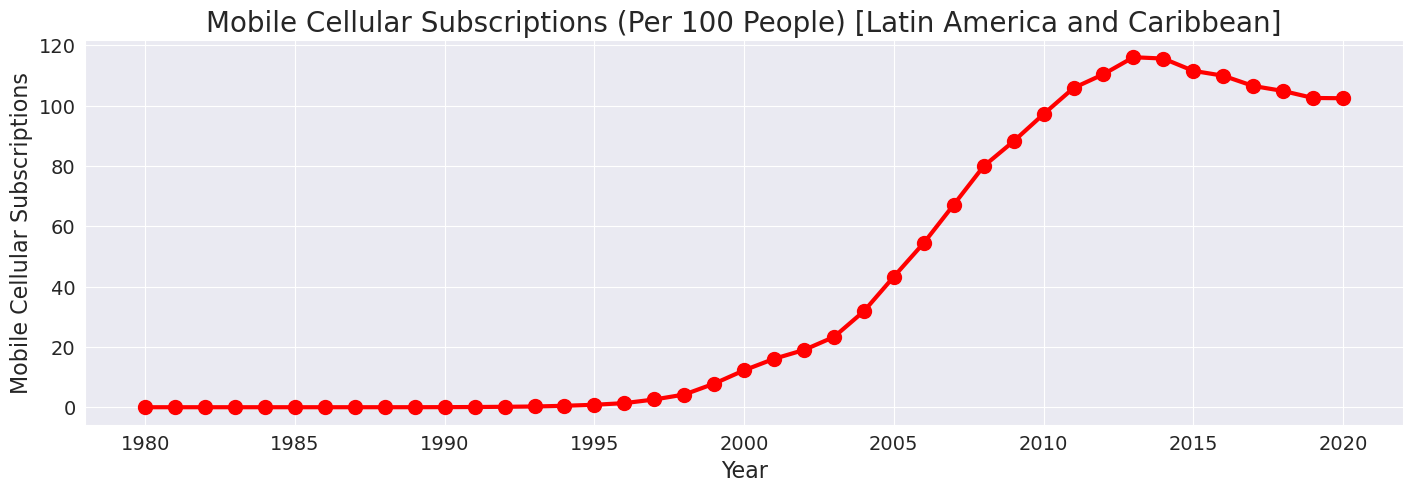

In [57]:
plt.plot(mobile_lac['Year'], mobile_lac['Mobile cellular subscriptions (per 100 people)'], 'o-r', lw=3, ms=10)

plt.xlabel('Year', fontsize=16)
plt.ylabel('Mobile Cellular Subscriptions', fontsize=16)
plt.title('Mobile Cellular Subscriptions (Per 100 People) [Latin America and Caribbean]', fontsize=20)

plt.show();

In [58]:
mobile_lac

,Entity,Year,Mobile cellular subscriptions (per 100 people)
0,Latin America and Caribbean,1980,0.000000
1,Latin America and Caribbean,1981,0.000000
2,Latin America and Caribbean,1982,0.000000
3,Latin America and Caribbean,1983,0.000000
4,Latin America and Caribbean,1984,0.000000
5,Latin America and Caribbean,1985,0.000000
6,Latin America and Caribbean,1986,0.000000
7,Latin America and Caribbean,1987,0.000954
8,Latin America and Caribbean,1988,0.002867
9,Latin America and Caribbean,1989,0.007261


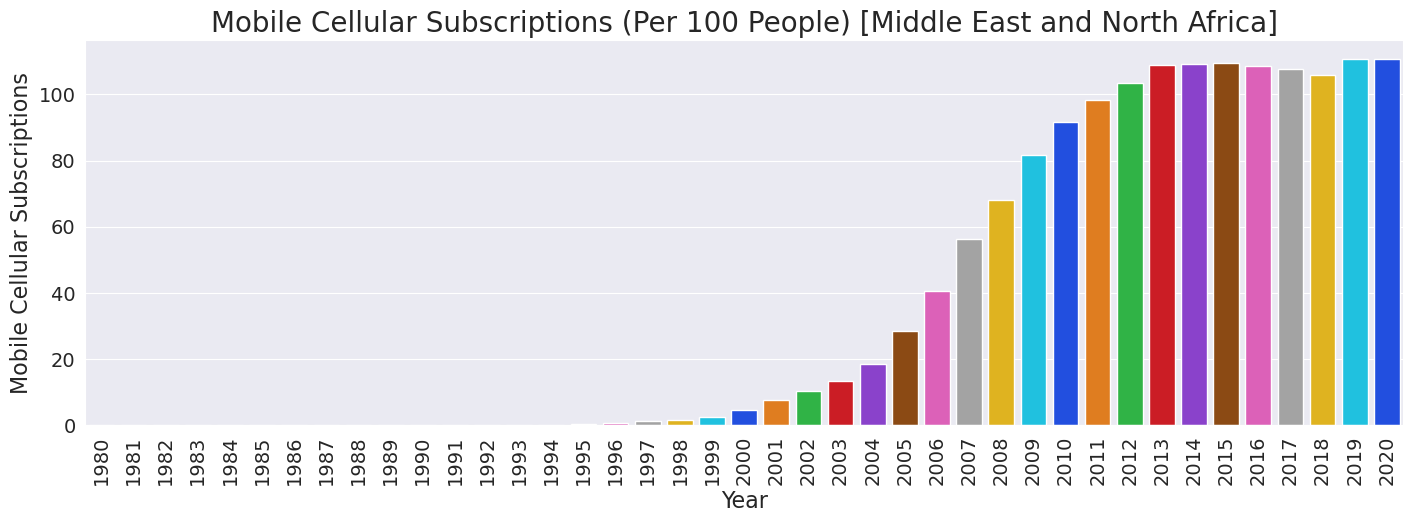

In [59]:
sns.barplot(x='Year', y='Mobile cellular subscriptions (per 100 people)', data=mobile_mena, palette='bright')

plt.xlabel('Year', fontsize=16)
plt.ylabel('Mobile Cellular Subscriptions', fontsize=16)
plt.xticks(rotation=90)
plt.title('Mobile Cellular Subscriptions (Per 100 People) [Middle East and North Africa]', fontsize=20)

plt.show();

In [60]:
mobile_mena

,Entity,Year,Mobile cellular subscriptions (per 100 people)
0,Middle East and North Africa,1980,0.000000
1,Middle East and North Africa,1981,0.000000
2,Middle East and North Africa,1982,0.001281
3,Middle East and North Africa,1983,0.001898
4,Middle East and North Africa,1984,0.002548
5,Middle East and North Africa,1985,0.004143
6,Middle East and North Africa,1986,0.010454
7,Middle East and North Africa,1987,0.015914
8,Middle East and North Africa,1988,0.018044
9,Middle East and North Africa,1989,0.026133


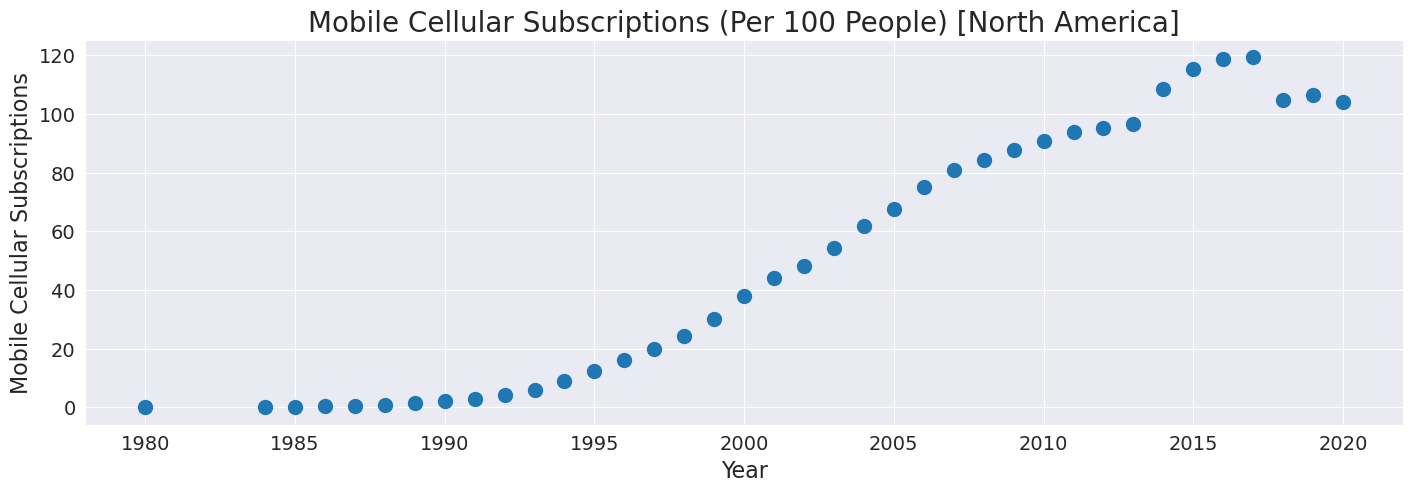

In [61]:
plt.scatter(mobile_na['Year'], mobile_na['Mobile cellular subscriptions (per 100 people)'], s=100)

plt.xlabel('Year', fontsize=16)
plt.ylabel('Mobile Cellular Subscriptions', fontsize=16)
plt.title('Mobile Cellular Subscriptions (Per 100 People) [North America]', fontsize=20)

plt.show();

In [62]:
mobile_na

,Entity,Year,Mobile cellular subscriptions (per 100 people)
0,North America,1980,0.000000
1,North America,1984,0.034728
2,North America,1985,0.132260
3,North America,1986,0.275875
4,North America,1987,0.489609
5,North America,1988,0.828685
6,North America,1989,1.391817
7,North America,1990,2.097764
8,North America,1991,2.950339
9,North America,1992,4.227920


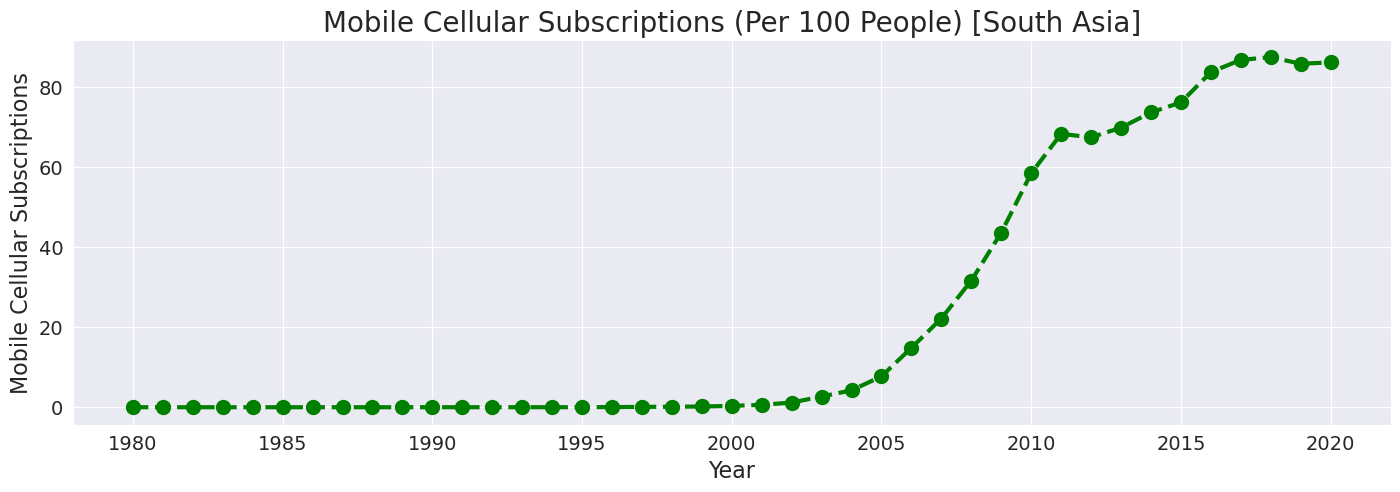

In [63]:
plt.plot(mobile_sa['Year'], mobile_sa['Mobile cellular subscriptions (per 100 people)'], 'o--g', lw=3, ms=10)

plt.xlabel('Year', fontsize=16)
plt.ylabel('Mobile Cellular Subscriptions', fontsize=16)
plt.title('Mobile Cellular Subscriptions (Per 100 People) [South Asia]', fontsize=20)

plt.show();

In [64]:
mobile_sa

,Entity,Year,Mobile cellular subscriptions (per 100 people)
0,South Asia,1980,0.000000
1,South Asia,1981,0.000000
2,South Asia,1982,0.000000
3,South Asia,1983,0.000000
4,South Asia,1984,0.000000
5,South Asia,1985,0.000000
6,South Asia,1986,0.000000
7,South Asia,1987,0.000000
8,South Asia,1988,0.000000
9,South Asia,1989,0.000000


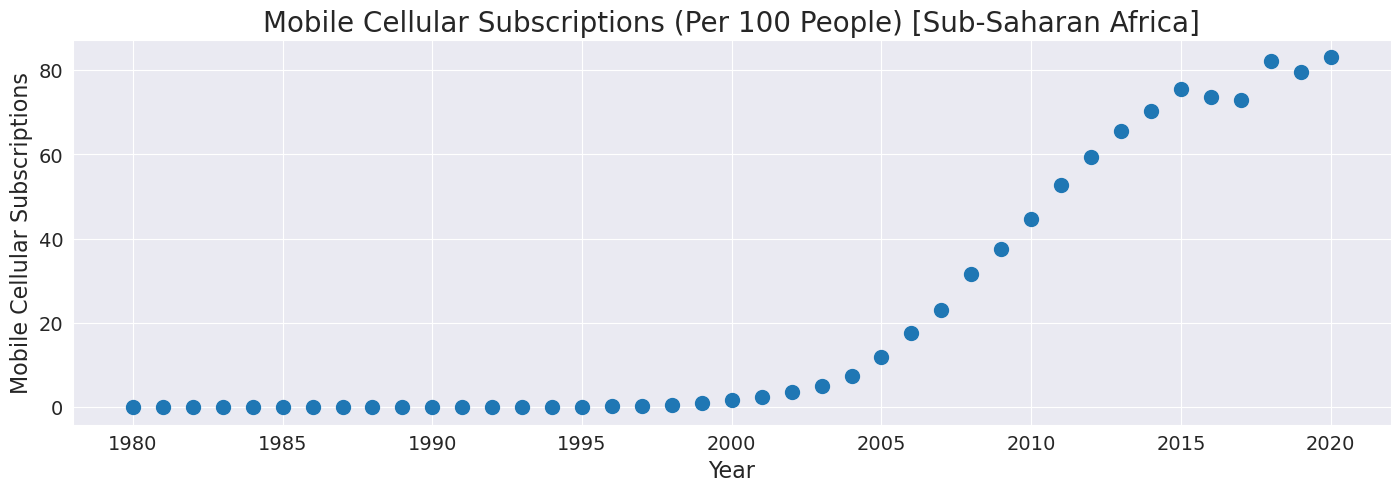

In [65]:
plt.scatter(mobile_ssa['Year'], mobile_ssa['Mobile cellular subscriptions (per 100 people)'], s=100)

plt.xlabel('Year', fontsize=16)
plt.ylabel('Mobile Cellular Subscriptions', fontsize=16)
plt.title('Mobile Cellular Subscriptions (Per 100 People) [Sub-Saharan Africa]', fontsize=20)
plt.show();

In [66]:
mobile_ssa

,Entity,Year,Mobile cellular subscriptions (per 100 people)
0,Sub-Saharan Africa,1980,0.000000
1,Sub-Saharan Africa,1981,0.000000
2,Sub-Saharan Africa,1982,0.000000
3,Sub-Saharan Africa,1983,0.000000
4,Sub-Saharan Africa,1984,0.000000
5,Sub-Saharan Africa,1985,0.000000
6,Sub-Saharan Africa,1986,0.000000
7,Sub-Saharan Africa,1987,0.000000
8,Sub-Saharan Africa,1988,0.000000
9,Sub-Saharan Africa,1989,0.000803


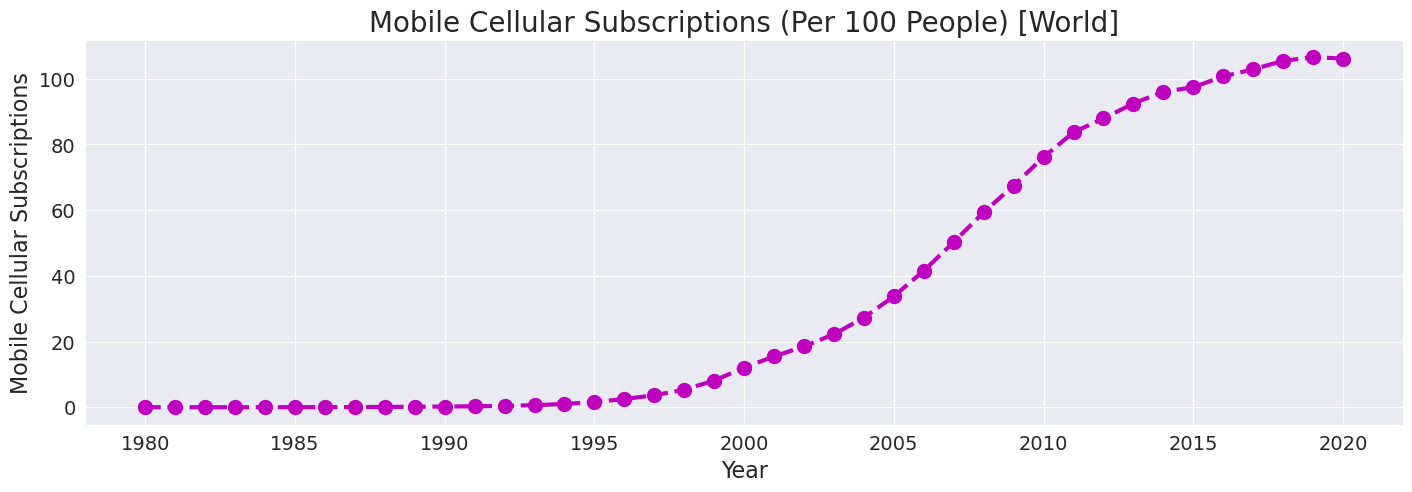

In [67]:
plt.plot(mobile_wor['Year'], mobile_wor['Mobile cellular subscriptions (per 100 people)'], 'o--m', lw=3, ms=10)

plt.xlabel('Year', fontsize=16)
plt.ylabel('Mobile Cellular Subscriptions', fontsize=16)
plt.title('Mobile Cellular Subscriptions (Per 100 People) [World]', fontsize=20)

plt.show();

In [68]:
mobile_wor

,Entity,Year,Mobile cellular subscriptions (per 100 people)
0,World,1980,0.000530
1,World,1981,0.001487
2,World,1982,0.002331
3,World,1983,0.003387
4,World,1984,0.006855
5,World,1985,0.015857
6,World,1986,0.029511
7,World,1987,0.050815
8,World,1988,0.084803
9,World,1989,0.141562


# Internet User Ratio

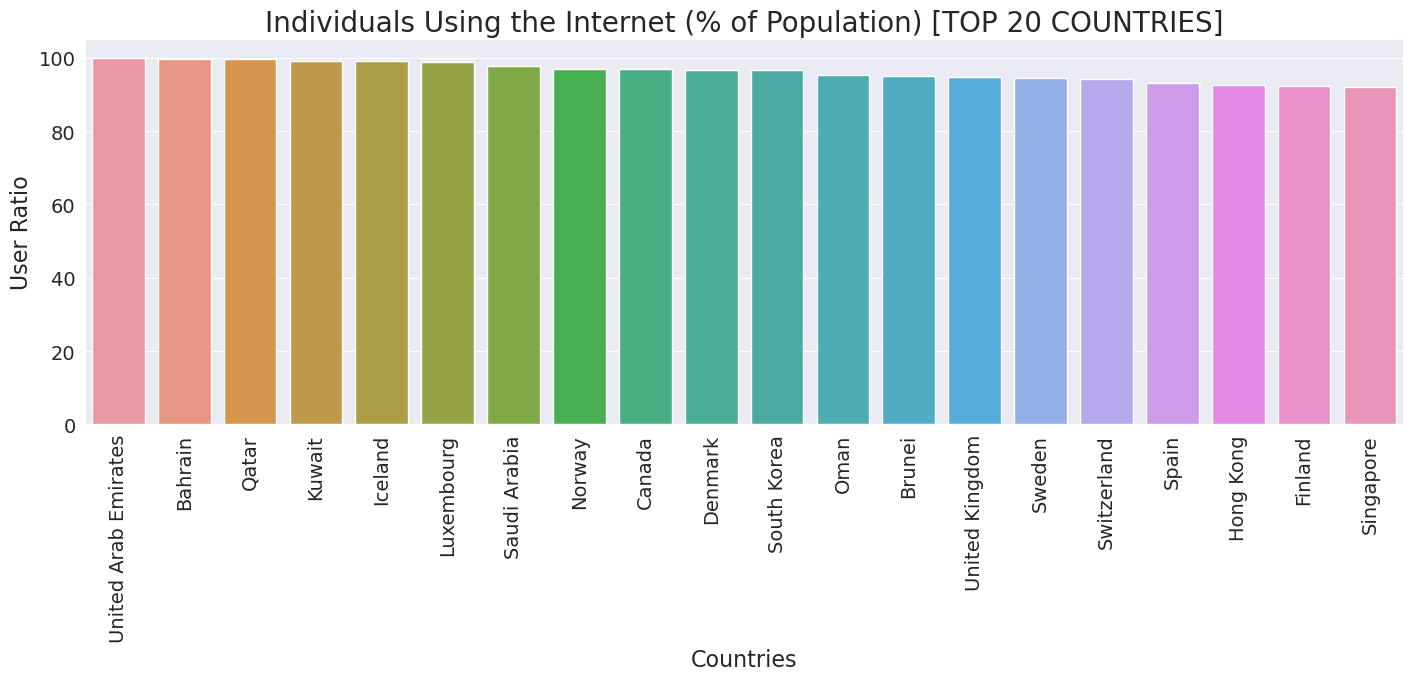

In [69]:
sns.barplot(x='Entity', y='Individuals using the Internet (% of population)', data=ratio_head)

plt.xlabel('Countries', fontsize=16)
plt.ylabel('User Ratio', fontsize=16)
plt.xticks(rotation=90)
plt.title('Individuals Using the Internet (% of Population) [TOP 20 COUNTRIES]', fontsize=20)

plt.show();

In [70]:
ratio_head

,Entity,Year,Individuals using the Internet (% of population)
0,United Arab Emirates,2020,100.000000
1,Bahrain,2020,99.669998
2,Qatar,2020,99.652847
3,Kuwait,2020,99.105881
4,Iceland,2020,99.000000
5,Luxembourg,2020,98.822426
6,Saudi Arabia,2020,97.860001
7,Norway,2020,97.000000
8,Canada,2020,96.970001
9,Denmark,2020,96.549149


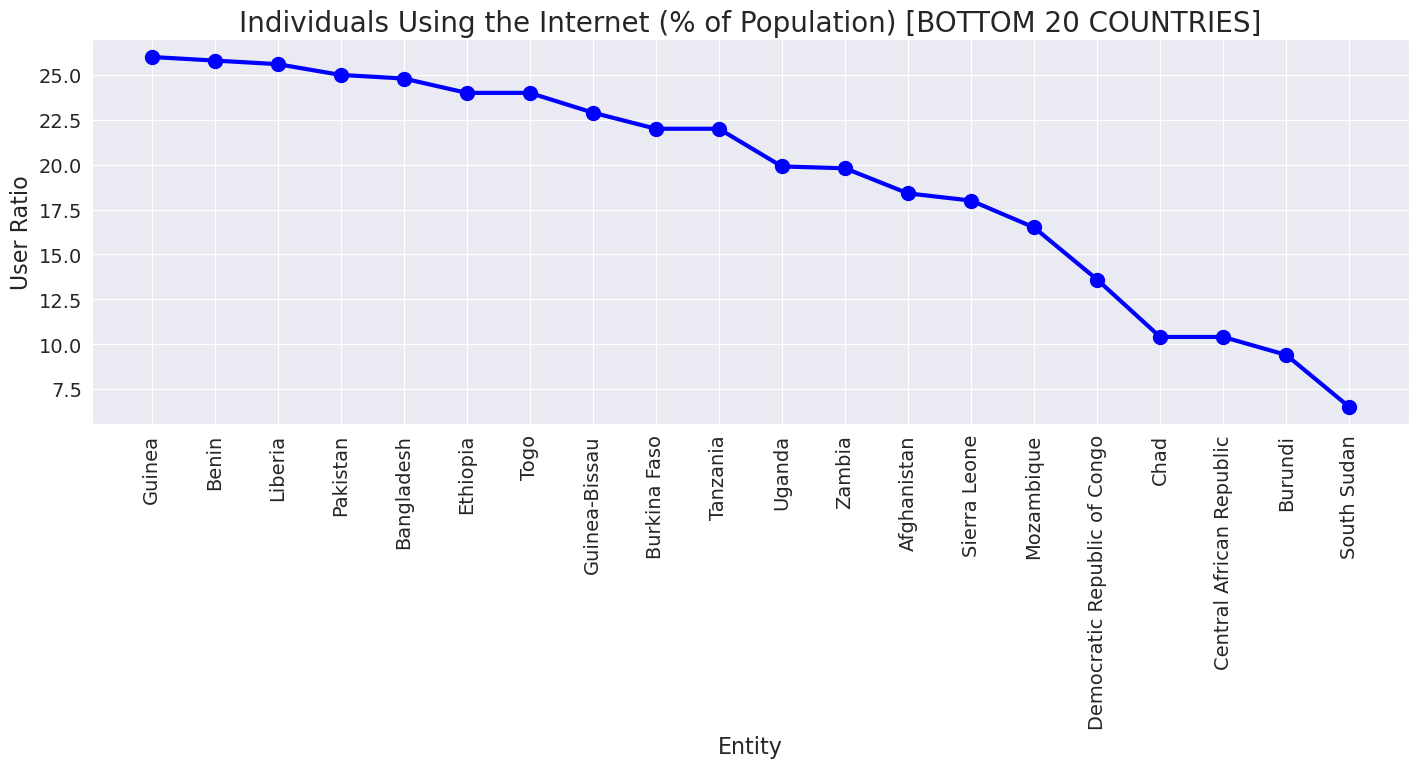

In [71]:
plt.plot(ratio_tail['Entity'], ratio_tail['Individuals using the Internet (% of population)'], 'o-b', lw=3, ms=10)

plt.xlabel('Entity', fontsize=16)
plt.ylabel('User Ratio', fontsize=16)
plt.xticks(rotation=90)
plt.title('Individuals Using the Internet (% of Population) [BOTTOM 20 COUNTRIES]', fontsize=20)

plt.show();

In [72]:
ratio_tail

,Entity,Year,Individuals using the Internet (% of population)
0,Guinea,2020,26.000000
1,Benin,2020,25.799999
2,Liberia,2020,25.600000
3,Pakistan,2020,25.000000
4,Bangladesh,2020,24.799999
5,Ethiopia,2020,24.000000
6,Togo,2020,24.000000
7,Guinea-Bissau,2020,22.900000
8,Burkina Faso,2020,22.000000
9,Tanzania,2020,22.000000


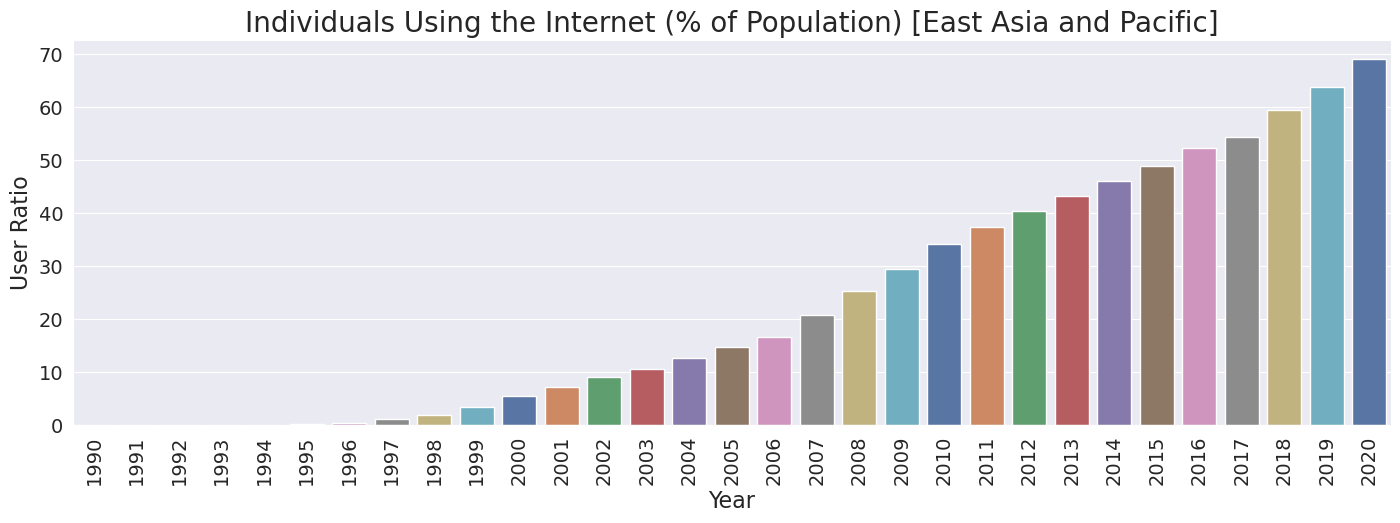

In [73]:
sns.barplot(x='Year', y='Individuals using the Internet (% of population)', data=ratio_eap, palette='deep')

plt.xlabel('Year', fontsize=16)
plt.ylabel('User Ratio', fontsize=16)
plt.xticks(rotation=90)
plt.title('Individuals Using the Internet (% of Population) [East Asia and Pacific]', fontsize=20)

plt.show();

In [74]:
ratio_eap

,Entity,Year,Individuals using the Internet (% of population)
0,East Asia and Pacific,1990,0.007211
1,East Asia and Pacific,1991,0.014868
2,East Asia and Pacific,1992,0.031198
3,East Asia and Pacific,1993,0.062184
4,East Asia and Pacific,1994,0.107777
5,East Asia and Pacific,1995,0.193067
6,East Asia and Pacific,1996,0.467537
7,East Asia and Pacific,1997,1.083686
8,East Asia and Pacific,1998,1.885415
9,East Asia and Pacific,1999,3.417878


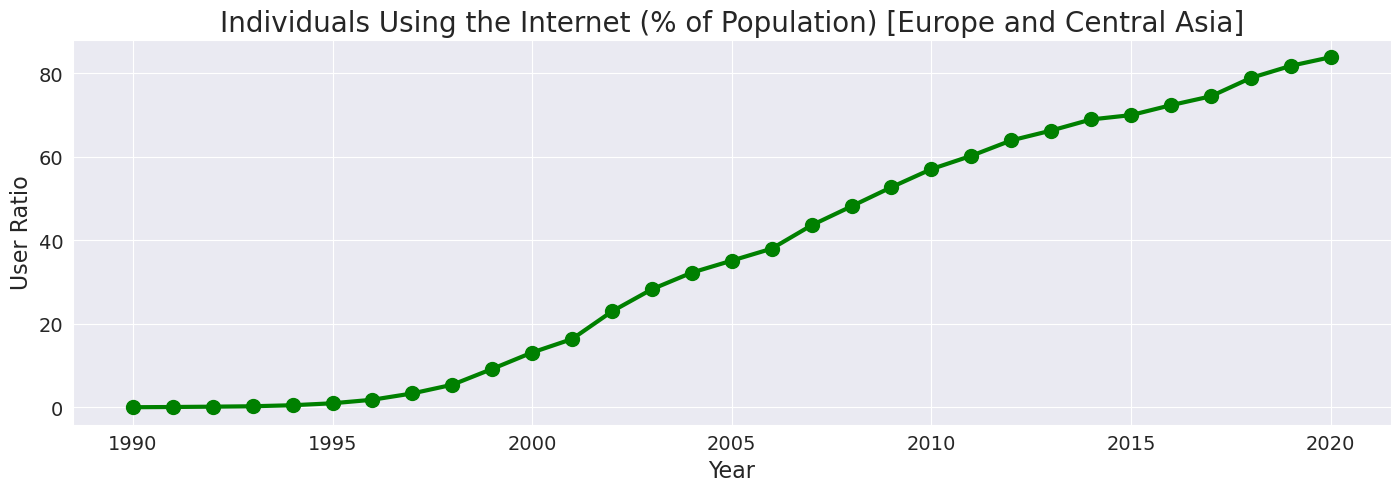

In [75]:
plt.plot(ratio_eca['Year'], ratio_eca['Individuals using the Internet (% of population)'], 'o-g', lw=3, ms=10)

plt.xlabel('Year', fontsize=16)
plt.ylabel('User Ratio', fontsize=16)
plt.title('Individuals Using the Internet (% of Population) [Europe and Central Asia]', fontsize=20)

plt.show();

In [76]:
ratio_eca

,Entity,Year,Individuals using the Internet (% of population)
0,Europe and Central Asia,1990,0.048058
1,Europe and Central Asia,1991,0.101975
2,Europe and Central Asia,1992,0.180908
3,Europe and Central Asia,1993,0.280383
4,Europe and Central Asia,1994,0.525901
5,Europe and Central Asia,1995,0.993127
6,Europe and Central Asia,1996,1.841430
7,Europe and Central Asia,1997,3.355170
8,Europe and Central Asia,1998,5.431181
9,Europe and Central Asia,1999,9.225804


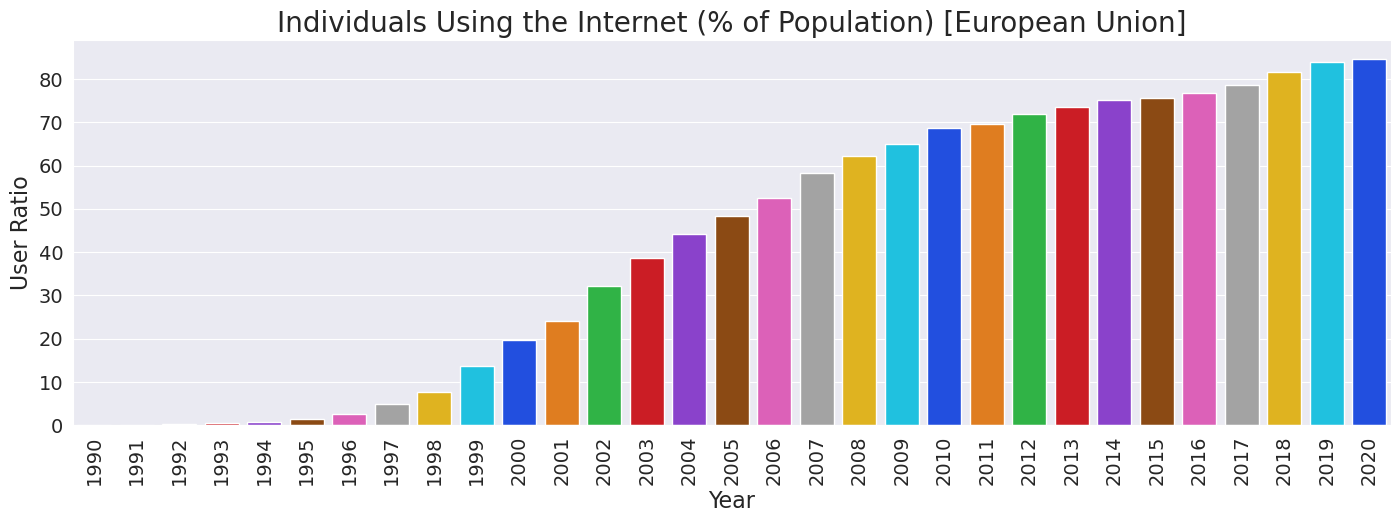

In [77]:
sns.barplot(x='Year', y='Individuals using the Internet (% of population)', data=ratio_eu, palette='bright')

plt.xlabel('Year', fontsize=16)
plt.ylabel('User Ratio', fontsize=16)
plt.xticks(rotation=90)
plt.title('Individuals Using the Internet (% of Population) [European Union]', fontsize=20)

plt.show();

In [78]:
ratio_eu

,Entity,Year,Individuals using the Internet (% of population)
0,European Union,1990,0.066722
1,European Union,1991,0.145184
2,European Union,1992,0.271839
3,European Union,1993,0.415061
4,European Union,1994,0.785199
5,European Union,1995,1.514689
6,European Union,1996,2.624623
7,European Union,1997,4.802361
8,European Union,1998,7.693032
9,European Union,1999,13.627860


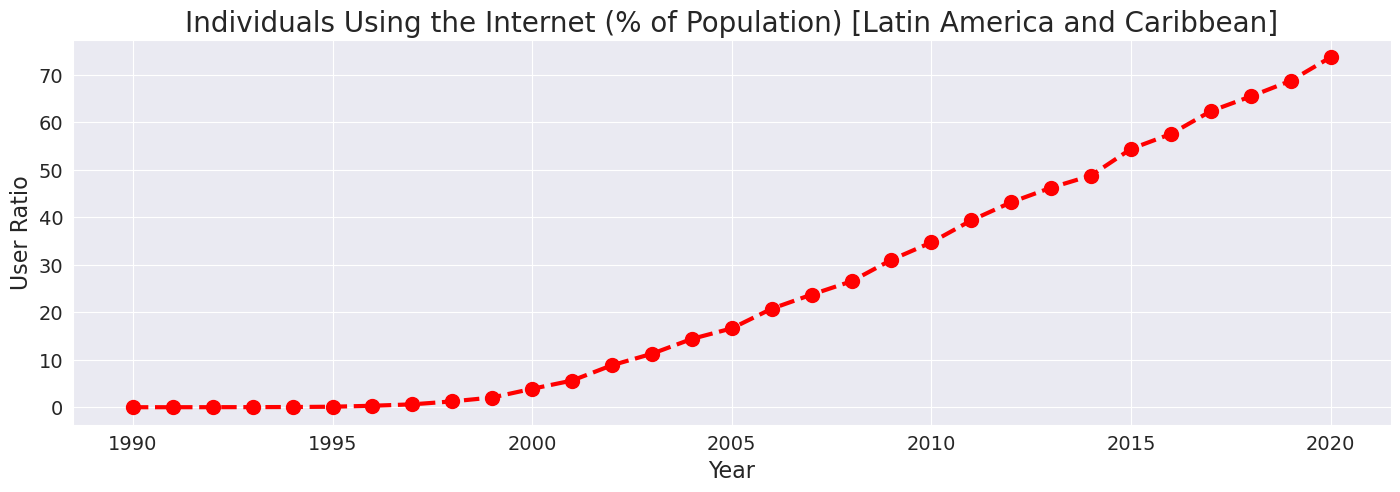

In [79]:
plt.plot(ratio_lac['Year'], ratio_lac['Individuals using the Internet (% of population)'], 'o--r', lw=3, ms=10)

plt.xlabel('Year', fontsize=16)
plt.ylabel('User Ratio', fontsize=16)
plt.title('Individuals Using the Internet (% of Population) [Latin America and Caribbean]', fontsize=20)

plt.show();

In [80]:
ratio_lac

,Entity,Year,Individuals using the Internet (% of population)
0,Latin America and Caribbean,1990,0.000000
1,Latin America and Caribbean,1991,0.002226
2,Latin America and Caribbean,1992,0.009637
3,Latin America and Caribbean,1993,0.021121
4,Latin America and Caribbean,1994,0.043407
5,Latin America and Caribbean,1995,0.105626
6,Latin America and Caribbean,1996,0.309552
7,Latin America and Caribbean,1997,0.608915
8,Latin America and Caribbean,1998,1.228739
9,Latin America and Caribbean,1999,2.046568


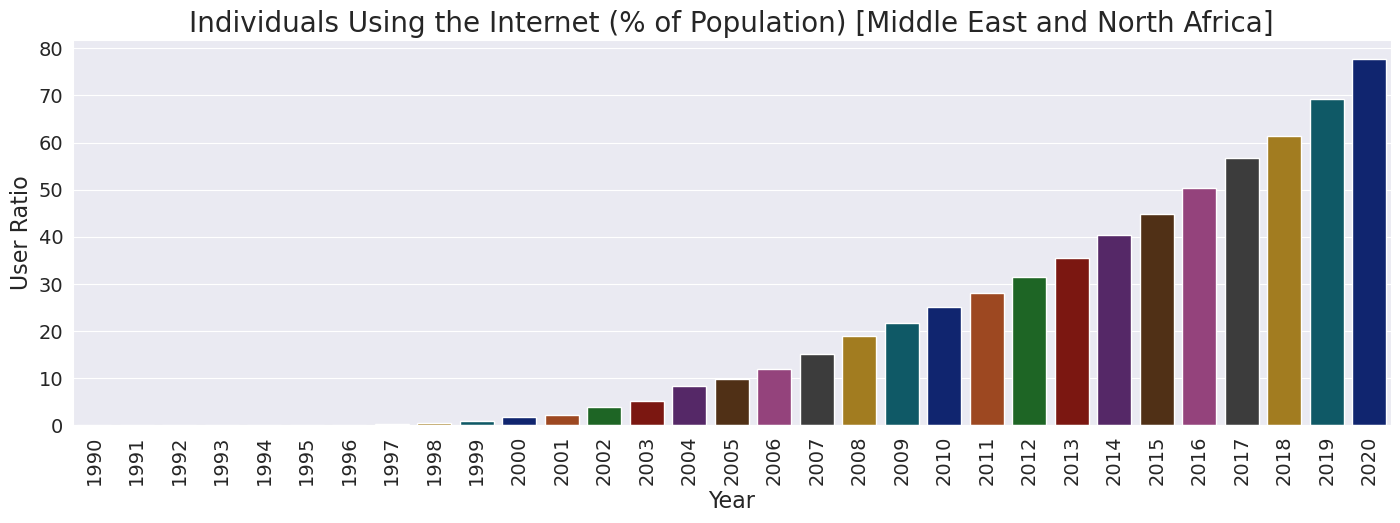

In [81]:
sns.barplot(x='Year', y='Individuals using the Internet (% of population)', data=ratio_mena, palette='dark')

plt.xlabel('Year', fontsize=16)
plt.ylabel('User Ratio', fontsize=16)
plt.xticks(rotation=90)
plt.title('Individuals Using the Internet (% of Population) [Middle East and North Africa]', fontsize=20)

plt.show();

In [82]:
ratio_mena

,Entity,Year,Individuals using the Internet (% of population)
0,Middle East and North Africa,1990,0.001939
1,Middle East and North Africa,1991,0.003777
2,Middle East and North Africa,1992,0.005522
3,Middle East and North Africa,1993,0.007987
4,Middle East and North Africa,1994,0.013152
5,Middle East and North Africa,1995,0.031096
6,Middle East and North Africa,1996,0.083897
7,Middle East and North Africa,1997,0.229257
8,Middle East and North Africa,1998,0.490050
9,Middle East and North Africa,1999,0.928125


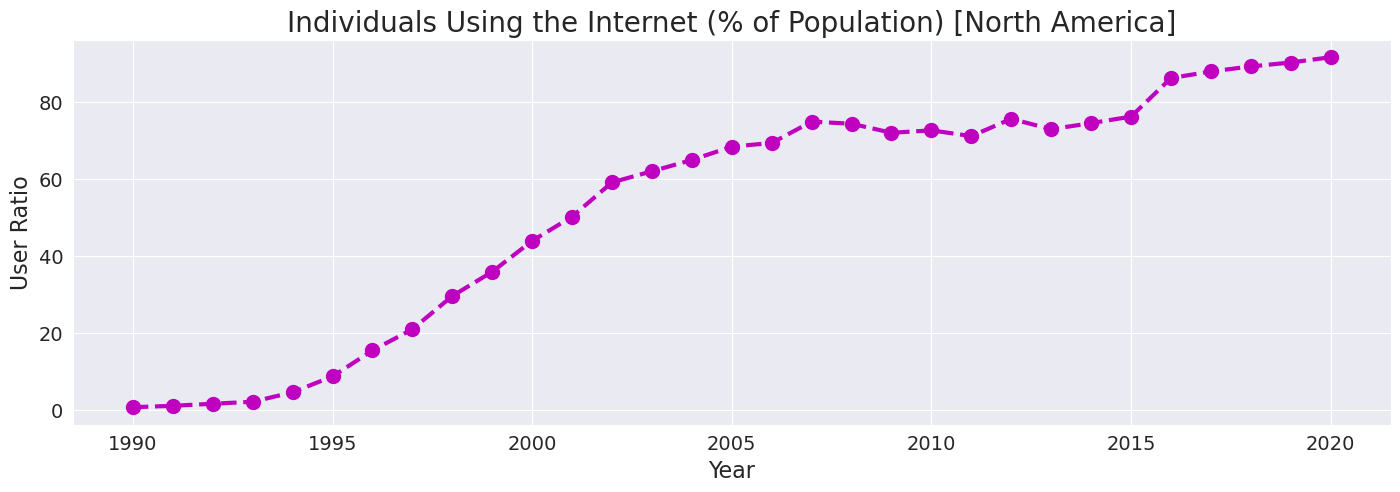

In [83]:
plt.plot(ratio_na['Year'], ratio_na['Individuals using the Internet (% of population)'], 'o--m', lw=3, ms=10)

plt.xlabel('Year', fontsize=16)
plt.ylabel('User Ratio', fontsize=16)
plt.title('Individuals Using the Internet (% of Population) [North America]', fontsize=20)

plt.show();

In [84]:
ratio_na

,Entity,Year,Individuals using the Internet (% of population)
0,North America,1990,0.742836
1,North America,1991,1.104414
2,North America,1992,1.643863
3,North America,1993,2.163472
4,North America,1994,4.615500
5,North America,1995,8.733954
6,North America,1996,15.464026
7,North America,1997,20.971434
8,North America,1998,29.582621
9,North America,1999,35.882710


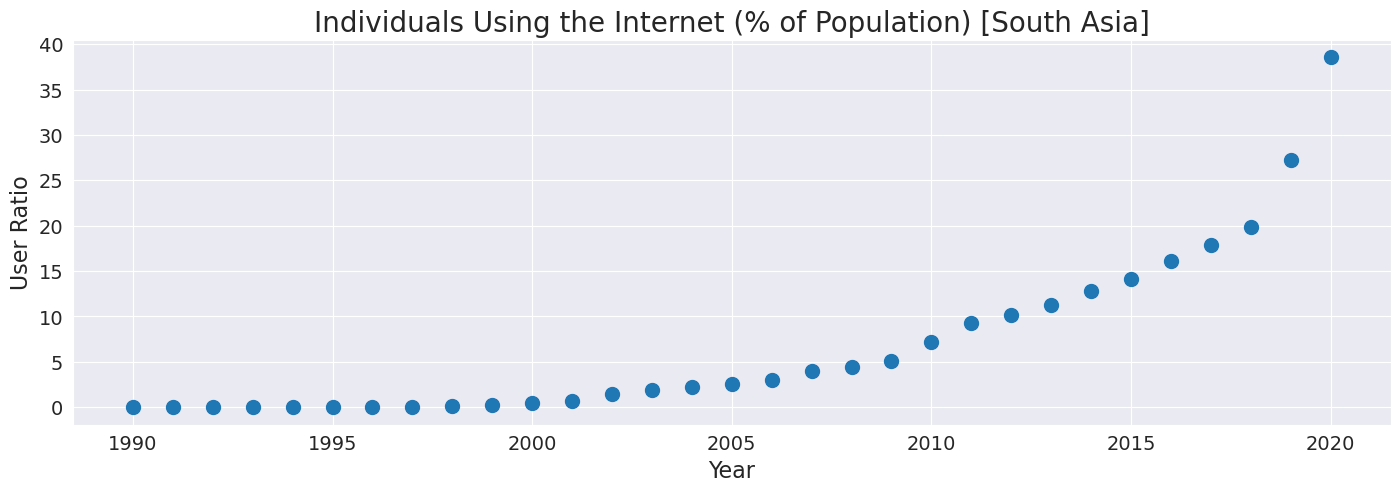

In [85]:
plt.scatter(ratio_sa['Year'], ratio_sa['Individuals using the Internet (% of population)'], s=100)

plt.xlabel('Year', fontsize=16)
plt.ylabel('User Ratio', fontsize=16)
plt.title('Individuals Using the Internet (% of Population) [South Asia]', fontsize=20)

plt.show();

In [86]:
ratio_sa

,Entity,Year,Individuals using the Internet (% of population)
0,South Asia,1990,0.000000
1,South Asia,1991,0.000000
2,South Asia,1992,0.000085
3,South Asia,1993,0.000167
4,South Asia,1994,0.000859
5,South Asia,1995,0.020147
6,South Asia,1996,0.040904
7,South Asia,1997,0.060391
8,South Asia,1998,0.117714
9,South Asia,1999,0.227647


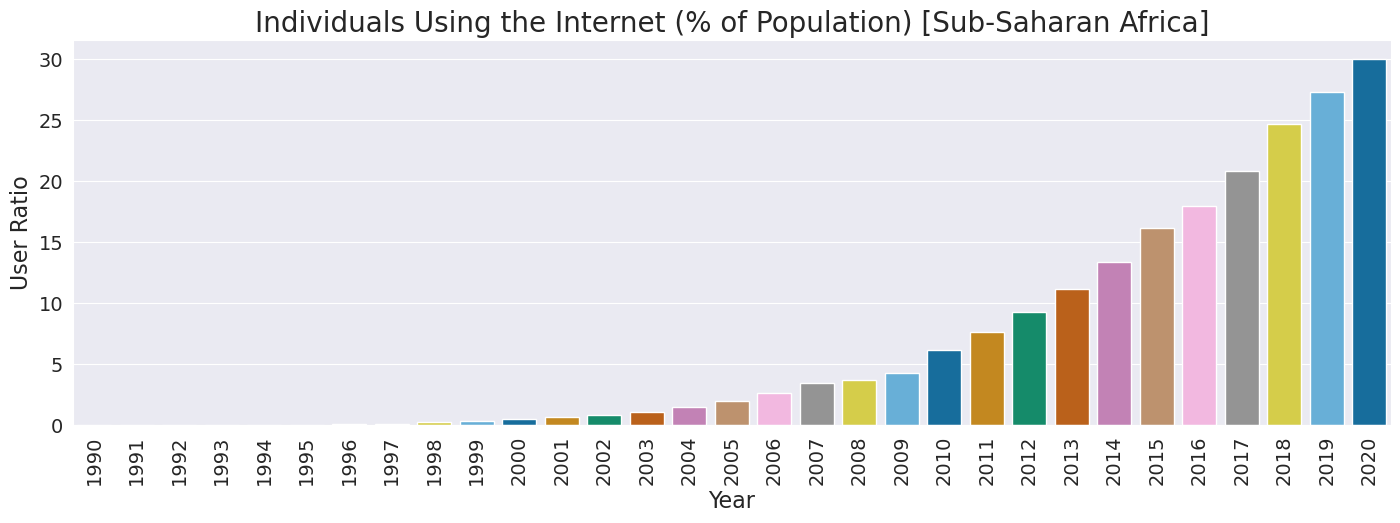

In [87]:
sns.barplot(x='Year', y='Individuals using the Internet (% of population)', data=ratio_ssa, palette='colorblind')

plt.xlabel('Year', fontsize=16)
plt.ylabel('User Ratio', fontsize=16)
plt.xticks(rotation=90)
plt.title('Individuals Using the Internet (% of Population) [Sub-Saharan Africa]', fontsize=20)

plt.show();

In [88]:
ratio_ssa

,Entity,Year,Individuals using the Internet (% of population)
0,Sub-Saharan Africa,1990,0.000000
1,Sub-Saharan Africa,1991,0.000957
2,Sub-Saharan Africa,1992,0.002793
3,Sub-Saharan Africa,1993,0.008152
4,Sub-Saharan Africa,1994,0.017773
5,Sub-Saharan Africa,1995,0.048720
6,Sub-Saharan Africa,1996,0.068736
7,Sub-Saharan Africa,1997,0.128980
8,Sub-Saharan Africa,1998,0.234454
9,Sub-Saharan Africa,1999,0.360339


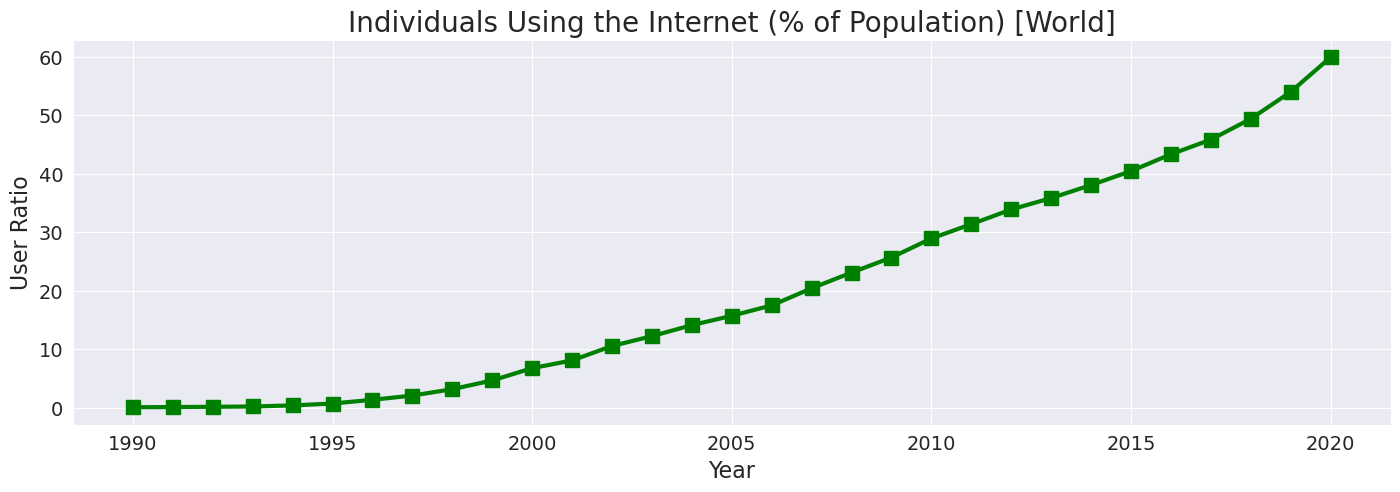

In [89]:
plt.plot(ratio_wor['Year'], ratio_wor['Individuals using the Internet (% of population)'], 's-g', lw=3, ms=10)

plt.xlabel('Year', fontsize=16)
plt.ylabel('User Ratio', fontsize=16)
plt.title('Individuals Using the Internet (% of Population) [World]', fontsize=20)

plt.show();

In [90]:
ratio_wor

,Entity,Year,Individuals using the Internet (% of population)
0,World,1990,0.049235
1,World,1991,0.079181
2,World,1992,0.125364
3,World,1993,0.178900
4,World,1994,0.359900
5,World,1995,0.681457
6,World,1996,1.323470
7,World,1997,2.039509
8,World,1998,3.136406
9,World,1999,4.629490


# CONCLUDING REMARKS

In conclusion, the past few decades have witnessed a remarkable growth in broadband subscriptions, internet users, mobile cellular subscriptions, and internet user ratios across the world. The development of high-speed broadband internet access, coupled with the proliferation of mobile devices, has revolutionized the way people access and use the internet, facilitating new applications and services that have transformed various industries and aspects of modern life.

However, challenges remain, particularly in ensuring equitable access to the internet, which is still not available to many people around the world, especially those in developing countries. Additionally, concerns over internet security, privacy, and digital divide have emerged, highlighting the need for careful policymaking and regulation to ensure the internet remains accessible, safe, and inclusive for all.

Looking ahead, the future of internet access and usage is likely to be shaped by technological innovations and regulatory developments that aim to address these challenges and expand access to new markets and populations. The next few years are likely to see further growth in broadband subscriptions, mobile cellular subscriptions, and internet users, as well as new trends and changes in the ways people access and use the internet.